<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/Stock_NeurIPS2018_SB3.py">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Deep Reinforcement Learning for Portfolio Management




# Content

* [1. Task Description](#0)
* [2. Install Python packages](#1)
    * [2.1. Install Packages through FinRL Library](#1.1)    
    * [2.2. A List of Python Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download and Preprocess Data](#2)
* [4. Stock Selection](#3)        
* [5. Feature Reduction](#4)     
* [6. Data Splitting](#5)
* [7. Equal Weights and Max sharpe](#6)
* [8. Introducing DRL Portfolios](#7)
* [9. Backtesting](#8)
     
  

<a id='0'></a>
# Part 1. Task Discription

We implement DRL models and  train a DRL agent for stock trading. This task is modeled as a Markov Decision Process (MDP), and the objective function is maximizing (expected) cumulative return.

We specify the state-action-reward as follows:

* **State s**: The state space represents an agent's perception of the market environment.

* **Action a**: The action space includes allowed actions that an agent can take at each state.

* **Reward function r(s, a, s′)**: Reward is an incentive for an agent to learn a better policy.

**Market environment**: The market enivironment will be the first 50 consituent stocks of Nasdaq index.

We then assess the DRL models to find the best performing model for maximizing returns and ultimately the portfolio value


The data for this case study is obtained from Yahoo Finance API.


<a id='1'></a>
# Part 2. Install Python Packages

<a id='1.1'></a>
## 2.1. Install packages


In [1]:
                                  ## install required packages
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

✨🍰✨ Everything looks OK!
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-kiwq92ym
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-kiwq92ym
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit d22c4a53c20e3f8d159712a3772ac565afaf3176
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-ejxlqbja/elegantrl_4c756d1b10414ff1902de62c540ac8a6
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-ejxlqbja/elegantrl_4c756d1b10414ff1902de62c540ac8a6
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit dde7ee4daa226450a43280e4ee02f1f23b565aa2
  Preparing metadata (setup.py) ... done


In [2]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git #clone the FinRL library to inst

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-m8odp6uo
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-m8odp6uo
  Resolved https://github.com/AI4Finance-LLC/FinRL-Library.git to commit d22c4a53c20e3f8d159712a3772ac565afaf3176
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-jypcx_h2/elegantrl_ba7844c0a825425bb3bce316c44b9507
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-jypcx_h2/elegantrl_ba7844c0a825425bb3bce316c44b9507
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit dde7ee4daa226450a43280e4ee02f1f23b565aa2
  Preparing metadata (setup.py) ... done



<a id='1.2'></a>
## 2.2. A list of Python packages
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

In [3]:
required = {'yfinance', 'pandas','numpy', 'matplotlib', 'stockstats','stable-baselines',
            'gym','tensorflow','pyfolio', 'ta', 'PyPortfolioOpt'}
#missing = required - installedPackages
#if missing:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install stockstats
!pip install gym
!pip install stable-baselines3[extra]
!pip install tensorflow
!pip install git+https://github.com/quantopian/pyfolio
!pip install ta
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.1.0
    Uninstall

<a id='1.3'></a>
## 2.3. Import Packages

In [198]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

In [5]:
## install finrl library if not installed

import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set} # list of installed packages

if 'finrl' not in installedPackages:
    !pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git #clone the FinRL library to inst

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [6]:
# @title Config.py
import pathlib

# import finrl

import pandas as pd
import datetime
import os

# pd.options.display.max_rows = 10
# pd.options.display.max_columns = 10


# PACKAGE_ROOT = pathlib.Path(finrl.__file__).resolve().parent
# PACKAGE_ROOT = pathlib.Path().resolve().parent

# TRAINED_MODEL_DIR = PACKAGE_ROOT / "trained_models"
# DATASET_DIR = PACKAGE_ROOT / "data"

# data
TRAINING_DATA_FILE = "data/ETF_SPY_2009_2020.csv"
TURBULENCE_DATA = "data/dow30_turbulence_index.csv"
TESTING_DATA_FILE = "test.csv"

# now = datetime.datetime.now()
# TRAINED_MODEL_DIR = f"trained_models/{now}"
DATA_SAVE_DIR = f"datasets"
TRAINED_MODEL_DIR = f"trained_models"
TENSORBOARD_LOG_DIR = f"tensorboard_log"
RESULTS_DIR = f"results"
# os.makedirs(TRAINED_MODEL_DIR)


## time_fmt = '%Y-%m-%d'
START_DATE = "2009-01-01"
END_DATE = "2020-12-01"

START_TRADE_DATE = "2019-01-01"

## dataset default columns
DEFAULT_DATA_COLUMNS = ["date", "tic", "close"]

## stockstats technical indicator column names
## check https://pypi.org/project/stockstats/ for different names
TECHNICAL_INDICATORS_LIST = ["macd", "rsi_30", "cci_30", "dx_30"]


## Model Parameters
A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.01, "learning_rate": 0.0007}
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 64,
}
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}
TD3_PARAMS = {"batch_size": 100, "buffer_size": 1000000, "learning_rate": 0.001}
SAC_PARAMS = {
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "batch_size": 64,
    "ent_coef": "auto_0.1",
}

########################################################
############## Stock Ticker Setup starts ##############
SINGLE_TICKER = ["AAPL"]

# self defined
MULTIPLE_STOCK_TICKER = ["AAPL", "MSFT", "FB"]

# check https://wrds-www.wharton.upenn.edu/ for U.S. index constituents
# Dow 30 constituents at 2019/01
NAS_100_TICKER = [
    "AAPL",
    "MSFT",
    "JPM",
    "V",
    "RTX",
    "PG",
    "GS",
    "NKE",
    "DIS",
    "AXP",
    "HD",
    "INTC",
    "WMT",
    "IBM",
    "MRK",
    "UNH",
    "KO",
    "CAT",
    "TRV",
    "JNJ",
    "CVX",
    "MCD",
    "VZ",
    "CSCO",
    "XOM",
    "BA",
    "MMM",
    "PFE",
    "WBA",
    "DD",
]

# Nasdaq 100 constituents at 2019/01
NAS_100_TICKER = [
    "AMGN",
    "AAPL",
    "AMAT",
    "INTC",
    "PCAR",
    "PAYX",
    "MSFT",
    "ADBE",
    "CSCO",
    "XLNX",
    "QCOM",
    "COST",
    "SBUX",
    "FISV",
    "CTXS",
    "INTU",
    "AMZN",
    "EBAY",
    "BIIB",
    "CHKP",
    "GILD",
    "NLOK",
    "CMCSA",
    "FAST",
    "ADSK",
    "CTSH",
    "NVDA",
    "GOOGL",
    "ISRG",
    "VRTX",
    "HSIC",
    "BIDU",
    "ATVI",
    "ADP",
    "ROST",
    "ORLY",
    "CERN",
    "BKNG",
    "MYL",
    "MU",
    "DLTR",
    "ALXN",
    "SIRI",
    "MNST",
    "AVGO",
    "TXN",
    "MDLZ",
    "FB",
    "ADI",
    "WDC",
    "REGN",
    "LBTYK",
    "VRSK",
    "NFLX",
    "TSLA",
    "CHTR",
    "MAR",
    "ILMN",
    "LRCX",
    "EA",
    "AAL",
    "WBA",
    "KHC",
    "BMRN",
    "JD",
    "SWKS",
    "INCY",
    "PYPL",
    "CDW",
    "FOXA",
    "MXIM",
    "TMUS",
    "EXPE",
    "TCOM",
    "ULTA",
    "CSX",
    "NTES",
    "MCHP",
    "CTAS",
    "KLAC",
    "HAS",
    "JBHT",
    "IDXX",
    "WYNN",
    "MELI",
    "ALGN",
    "CDNS",
    "WDAY",
    "SNPS",
    "ASML",
    "TTWO",
    "PEP",
    "NXPI",
    "XEL",
    "AMD",
    "NTAP",
    "VRSN",
    "LULU",
    "WLTW",
    "UAL",
]

# SP 500 constituents at 2019
SP_500_TICKER = [
    "A",
    "AAL",
    "AAP",
    "AAPL",
    "ABBV",
    "ABC",
    "ABMD",
    "ABT",
    "ACN",
    "ADBE",
    "ADI",
    "ADM",
    "ADP",
    "ADS",
    "ADSK",
    "AEE",
    "AEP",
    "AES",
    "AFL",
    "AGN",
    "AIG",
    "AIV",
    "AIZ",
    "AJG",
    "AKAM",
    "ALB",
    "ALGN",
    "ALK",
    "ALL",
    "ALLE",
    "ALXN",
    "AMAT",
    "AMCR",
    "AMD",
    "AME",
    "AMG",
    "AMGN",
    "AMP",
    "AMT",
    "AMZN",
    "ANET",
    "ANSS",
    "ANTM",
    "AON",
    "AOS",
    "APA",
    "APD",
    "APH",
    "APTV",
    "ARE",
    "ARNC",
    "ATO",
    "ATVI",
    "AVB",
    "AVGO",
    "AVY",
    "AWK",
    "AXP",
    "AZO",
    "BA",
    "BAC",
    "BAX",
    "BBT",
    "BBY",
    "BDX",
    "BEN",
    "BF.B",
    "BHGE",
    "BIIB",
    "BK",
    "BKNG",
    "BLK",
    "BLL",
    "BMY",
    "BR",
    "BRK.B",
    "BSX",
    "BWA",
    "BXP",
    "C",
    "CAG",
    "CAH",
    "CAT",
    "CB",
    "CBOE",
    "CBRE",
    "CBS",
    "CCI",
    "CCL",
    "CDNS",
    "CE",
    "CELG",
    "CERN",
    "CF",
    "CFG",
    "CHD",
    "CHRW",
    "CHTR",
    "CI",
    "CINF",
    "CL",
    "CLX",
    "CMA",
    "CMCSA",
    "CME",
    "CMG",
    "CMI",
    "CMS",
    "CNC",
    "CNP",
    "COF",
    "COG",
    "COO",
    "COP",
    "COST",
    "COTY",
    "CPB",
    "CPRI",
    "CPRT",
    "CRM",
    "CSCO",
    "CSX",
    "CTAS",
    "CTL",
    "CTSH",
    "CTVA",
    "CTXS",
    "CVS",
    "CVX",
    "CXO",
    "D",
    "DAL",
    "DD",
    "DE",
    "DFS",
    "DG",
    "DGX",
    "DHI",
    "DHR",
    "DIS",
    "DISCK",
    "DISH",
    "DLR",
    "DLTR",
    "DOV",
    "DOW",
    "DRE",
    "DRI",
    "DTE",
    "DUK",
    "DVA",
    "DVN",
    "DXC",
    "EA",
    "EBAY",
    "ECL",
    "ED",
    "EFX",
    "EIX",
    "EL",
    "EMN",
    "EMR",
    "EOG",
    "EQIX",
    "EQR",
    "ES",
    "ESS",
    "ETFC",
    "ETN",
    "ETR",
    "EVRG",
    "EW",
    "EXC",
    "EXPD",
    "EXPE",
    "EXR",
    "F",
    "FANG",
    "FAST",
    "FB",
    "FBHS",
    "FCX",
    "FDX",
    "FE",
    "FFIV",
    "FIS",
    "FISV",
    "FITB",
    "FLIR",
    "FLS",
    "FLT",
    "FMC",
    "FOXA",
    "FRC",
    "FRT",
    "FTI",
    "FTNT",
    "FTV",
    "GD",
    "GE",
    "GILD",
    "GIS",
    "GL",
    "GLW",
    "GM",
    "GOOG",
    "GPC",
    "GPN",
    "GPS",
    "GRMN",
    "GS",
    "GWW",
    "HAL",
    "HAS",
    "HBAN",
    "HBI",
    "HCA",
    "HCP",
    "HD",
    "HES",
    "HFC",
    "HIG",
    "HII",
    "HLT",
    "HOG",
    "HOLX",
    "HON",
    "HP",
    "HPE",
    "HPQ",
    "HRB",
    "HRL",
    "HSIC",
    "HST",
    "HSY",
    "HUM",
    "IBM",
    "ICE",
    "IDXX",
    "IEX",
    "IFF",
    "ILMN",
    "INCY",
    "INFO",
    "INTC",
    "INTU",
    "IP",
    "IPG",
    "IPGP",
    "IQV",
    "IR",
    "IRM",
    "ISRG",
    "IT",
    "ITW",
    "IVZ",
    "JBHT",
    "JCI",
    "JEC",
    "JEF",
    "JKHY",
    "JNJ",
    "JNPR",
    "JPM",
    "JWN",
    "K",
    "KEY",
    "KEYS",
    "KHC",
    "KIM",
    "KLAC",
    "KMB",
    "KMI",
    "KMX",
    "KO",
    "KR",
    "KSS",
    "KSU",
    "L",
    "LB",
    "LDOS",
    "LEG",
    "LEN",
    "LH",
    "LHX",
    "LIN",
    "LKQ",
    "LLY",
    "LMT",
    "LNC",
    "LNT",
    "LOW",
    "LRCX",
    "LUV",
    "LW",
    "LYB",
    "M",
    "MA",
    "MAA",
    "MAC",
    "MAR",
    "MAS",
    "MCD",
    "MCHP",
    "MCK",
    "MCO",
    "MDLZ",
    "MDT",
    "MET",
    "MGM",
    "MHK",
    "MKC",
    "MKTX",
    "MLM",
    "MMC",
    "MMM",
    "MNST",
    "MO",
    "MOS",
    "MPC",
    "MRK",
    "MRO",
    "MS",
    "MSCI",
    "MSFT",
    "MSI",
    "MTB",
    "MTD",
    "MU",
    "MXIM",
    "MYL",
    "NBL",
    "NCLH",
    "NDAQ",
    "NEE",
    "NEM",
    "NFLX",
    "NI",
    "NKE",
    "NKTR",
    "NLSN",
    "NOC",
    "NOV",
    "NRG",
    "NSC",
    "NTAP",
    "NTRS",
    "NUE",
    "NVDA",
    "NWL",
    "NWS",
    "O",
    "OI",
    "OKE",
    "OMC",
    "ORCL",
    "ORLY",
    "OXY",
    "PAYX",
    "PBCT",
    "PCAR",
    "PEG",
    "PEP",
    "PFE",
    "PFG",
    "PG",
    "PGR",
    "PH",
    "PHM",
    "PKG",
    "PKI",
    "PLD",
    "PM",
    "PNC",
    "PNR",
    "PNW",
    "PPG",
    "PPL",
    "PRGO",
    "PRU",
    "PSA",
    "PSX",
    "PVH",
    "PWR",
    "PXD",
    "PYPL",
    "QCOM",
    "QRVO",
    "RCL",
    "RE",
    "REG",
    "REGN",
    "RF",
    "RHI",
    "RJF",
    "RL",
    "RMD",
    "ROK",
    "ROL",
    "ROP",
    "ROST",
    "RSG",
    "RTN",
    "SBAC",
    "SBUX",
    "SCHW",
    "SEE",
    "SHW",
    "SIVB",
    "SJM",
    "SLB",
    "SLG",
    "SNA",
    "SNPS",
    "SO",
    "SPG",
    "SPGI",
    "SRE",
    "STI",
    "STT",
    "STX",
    "STZ",
    "SWK",
    "SWKS",
    "SYF",
    "SYK",
    "SYMC",
    "SYY",
    "T",
    "TAP",
    "TDG",
    "TEL",
    "TFX",
    "TGT",
    "TIF",
    "TJX",
    "TMO",
    "TMUS",
    "TPR",
    "TRIP",
    "TROW",
    "TRV",
    "TSCO",
    "TSN",
    "TSS",
    "TTWO",
    "TWTR",
    "TXN",
    "TXT",
    "UA",
    "UAL",
    "UDR",
    "UHS",
    "ULTA",
    "UNH",
    "UNM",
    "UNP",
    "UPS",
    "URI",
    "USB",
    "UTX",
    "V",
    "VAR",
    "VFC",
    "VIAB",
    "VLO",
    "VMC",
    "VNO",
    "VRSK",
    "VRSN",
    "VRTX",
    "VTR",
    "VZ",
    "WAB",
    "WAT",
    "WBA",
    "WCG",
    "WDC",
    "WEC",
    "WELL",
    "WFC",
    "WHR",
    "WLTW",
    "WM",
    "WMB",
    "WMT",
    "WRK",
    "WU",
    "WY",
    "WYNN",
    "XEC",
    "XEL",
    "XLNX",
    "XOM",
    "XRAY",
    "XRX",
    "XYL",
    "YUM",
    "ZBH",
    "ZION",
    "ZTS",
]

# Hang Seng Index constituents at 2019/01
HSI_50_TICKER = [
    "0011.HK",
    "0005.HK",
    "0012.HK",
    "0006.HK",
    "0003.HK",
    "0016.HK",
    "0019.HK",
    "0002.HK",
    "0001.HK",
    "0267.HK",
    "0101.HK",
    "0941.HK",
    "0762.HK",
    "0066.HK",
    "0883.HK",
    "2388.HK",
    "0017.HK",
    "0083.HK",
    "0939.HK",
    "0388.HK",
    "0386.HK",
    "3988.HK",
    "2628.HK",
    "1398.HK",
    "2318.HK",
    "3328.HK",
    "0688.HK",
    "0857.HK",
    "1088.HK",
    "0700.HK",
    "0836.HK",
    "1109.HK",
    "1044.HK",
    "1299.HK",
    "0151.HK",
    "1928.HK",
    "0027.HK",
    "2319.HK",
    "0823.HK",
    "1113.HK",
    "1038.HK",
    "2018.HK",
    "0175.HK",
    "0288.HK",
    "1997.HK",
    "2007.HK",
    "2382.HK",
    "1093.HK",
    "1177.HK",
    "2313.HK",
]

# www.csindex.com.cn, for SSE and CSI adjustments
# SSE 50 Index constituents at 2019
SSE_50_TICKER = [
    "600000.SS",
    "600036.SS",
    "600104.SS",
    "600030.SS",
    "601628.SS",
    "601166.SS",
    "601318.SS",
    "601328.SS",
    "601088.SS",
    "601857.SS",
    "601601.SS",
    "601668.SS",
    "601288.SS",
    "601818.SS",
    "601989.SS",
    "601398.SS",
    "600048.SS",
    "600028.SS",
    "600050.SS",
    "600519.SS",
    "600016.SS",
    "600887.SS",
    "601688.SS",
    "601186.SS",
    "601988.SS",
    "601211.SS",
    "601336.SS",
    "600309.SS",
    "603993.SS",
    "600690.SS",
    "600276.SS",
    "600703.SS",
    "600585.SS",
    "603259.SS",
    "601888.SS",
    "601138.SS",
    "600196.SS",
    "601766.SS",
    "600340.SS",
    "601390.SS",
    "601939.SS",
    "601111.SS",
    "600029.SS",
    "600019.SS",
    "601229.SS",
    "601800.SS",
    "600547.SS",
    "601006.SS",
    "601360.SS",
    "600606.SS",
    "601319.SS",
    "600837.SS",
    "600031.SS",
    "601066.SS",
    "600009.SS",
    "601236.SS",
    "601012.SS",
    "600745.SS",
    "600588.SS",
    "601658.SS",
    "601816.SS",
    "603160.SS",
]

# CSI 300 Index constituents at 2019
CSI_300_TICKER = [
    "600000.SS",
    "600004.SS",
    "600009.SS",
    "600010.SS",
    "600011.SS",
    "600015.SS",
    "600016.SS",
    "600018.SS",
    "600019.SS",
    "600025.SS",
    "600027.SS",
    "600028.SS",
    "600029.SS",
    "600030.SS",
    "600031.SS",
    "600036.SS",
    "600038.SS",
    "600048.SS",
    "600050.SS",
    "600061.SS",
    "600066.SS",
    "600068.SS",
    "600085.SS",
    "600089.SS",
    "600104.SS",
    "600109.SS",
    "600111.SS",
    "600115.SS",
    "600118.SS",
    "600170.SS",
    "600176.SS",
    "600177.SS",
    "600183.SS",
    "600188.SS",
    "600196.SS",
    "600208.SS",
    "600219.SS",
    "600221.SS",
    "600233.SS",
    "600271.SS",
    "600276.SS",
    "600297.SS",
    "600299.SS",
    "600309.SS",
    "600332.SS",
    "600340.SS",
    "600346.SS",
    "600352.SS",
    "600362.SS",
    "600369.SS",
    "600372.SS",
    "600383.SS",
    "600390.SS",
    "600398.SS",
    "600406.SS",
    "600436.SS",
    "600438.SS",
    "600482.SS",
    "600487.SS",
    "600489.SS",
    "600498.SS",
    "600516.SS",
    "600519.SS",
    "600522.SS",
    "600547.SS",
    "600570.SS",
    "600583.SS",
    "600585.SS",
    "600588.SS",
    "600606.SS",
    "600637.SS",
    "600655.SS",
    "600660.SS",
    "600674.SS",
    "600690.SS",
    "600703.SS",
    "600705.SS",
    "600741.SS",
    "600745.SS",
    "600760.SS",
    "600795.SS",
    "600809.SS",
    "600837.SS",
    "600848.SS",
    "600867.SS",
    "600886.SS",
    "600887.SS",
    "600893.SS",
    "600900.SS",
    "600919.SS",
    "600926.SS",
    "600928.SS",
    "600958.SS",
    "600968.SS",
    "600977.SS",
    "600989.SS",
    "600998.SS",
    "600999.SS",
    "601006.SS",
    "601009.SS",
    "601012.SS",
    "601018.SS",
    "601021.SS",
    "601066.SS",
    "601077.SS",
    "601088.SS",
    "601100.SS",
    "601108.SS",
    "601111.SS",
    "601117.SS",
    "601138.SS",
    "601155.SS",
    "601162.SS",
    "601166.SS",
    "601169.SS",
    "601186.SS",
    "601198.SS",
    "601211.SS",
    "601212.SS",
    "601216.SS",
    "601225.SS",
    "601229.SS",
    "601231.SS",
    "601236.SS",
    "601238.SS",
    "601288.SS",
    "601298.SS",
    "601318.SS",
    "601319.SS",
    "601328.SS",
    "601336.SS",
    "601360.SS",
    "601377.SS",
    "601390.SS",
    "601398.SS",
    "601555.SS",
    "601577.SS",
    "601600.SS",
    "601601.SS",
    "601607.SS",
    "601618.SS",
    "601628.SS",
    "601633.SS",
    "601658.SS",
    "601668.SS",
    "601669.SS",
    "601688.SS",
    "601698.SS",
    "601727.SS",
    "601766.SS",
    "601788.SS",
    "601800.SS",
    "601808.SS",
    "601816.SS",
    "601818.SS",
    "601828.SS",
    "601838.SS",
    "601857.SS",
    "601877.SS",
    "601878.SS",
    "601881.SS",
    "601888.SS",
    "601898.SS",
    "601899.SS",
    "601901.SS",
    "601916.SS",
    "601919.SS",
    "601933.SS",
    "601939.SS",
    "601985.SS",
    "601988.SS",
    "601989.SS",
    "601992.SS",
    "601997.SS",
    "601998.SS",
    "603019.SS",
    "603156.SS",
    "603160.SS",
    "603259.SS",
    "603260.SS",
    "603288.SS",
    "603369.SS",
    "603501.SS",
    "603658.SS",
    "603799.SS",
    "603833.SS",
    "603899.SS",
    "603986.SS",
    "603993.SS",
    "000001.SZ",
    "000002.SZ",
    "000063.SZ",
    "000066.SZ",
    "000069.SZ",
    "000100.SZ",
    "000157.SZ",
    "000166.SZ",
    "000333.SZ",
    "000338.SZ",
    "000425.SZ",
    "000538.SZ",
    "000568.SZ",
    "000596.SZ",
    "000625.SZ",
    "000627.SZ",
    "000651.SZ",
    "000656.SZ",
    "000661.SZ",
    "000671.SZ",
    "000703.SZ",
    "000708.SZ",
    "000709.SZ",
    "000723.SZ",
    "000725.SZ",
    "000728.SZ",
    "000768.SZ",
    "000776.SZ",
    "000783.SZ",
    "000786.SZ",
    "000858.SZ",
    "000860.SZ",
    "000876.SZ",
    "000895.SZ",
    "000938.SZ",
    "000961.SZ",
    "000963.SZ",
    "000977.SZ",
    "001979.SZ",
    "002001.SZ",
    "002007.SZ",
    "002008.SZ",
    "002024.SZ",
    "002027.SZ",
    "002032.SZ",
    "002044.SZ",
    "002050.SZ",
    "002120.SZ",
    "002129.SZ",
    "002142.SZ",
    "002146.SZ",
    "002153.SZ",
    "002157.SZ",
    "002179.SZ",
    "002202.SZ",
    "002230.SZ",
    "002236.SZ",
    "002241.SZ",
    "002252.SZ",
    "002271.SZ",
    "002304.SZ",
    "002311.SZ",
    "002352.SZ",
    "002371.SZ",
    "002410.SZ",
    "002415.SZ",
    "002422.SZ",
    "002456.SZ",
    "002460.SZ",
    "002463.SZ",
    "002466.SZ",
    "002468.SZ",
    "002475.SZ",
    "002493.SZ",
    "002508.SZ",
    "002555.SZ",
    "002558.SZ",
    "002594.SZ",
    "002601.SZ",
    "002602.SZ",
    "002607.SZ",
    "002624.SZ",
    "002673.SZ",
    "002714.SZ",
    "002736.SZ",
    "002739.SZ",
    "002773.SZ",
    "002841.SZ",
    "002916.SZ",
    "002938.SZ",
    "002939.SZ",
    "002945.SZ",
    "002958.SZ",
    "003816.SZ",
    "300003.SZ",
    "300014.SZ",
    "300015.SZ",
    "300033.SZ",
    "300059.SZ",
    "300122.SZ",
    "300124.SZ",
    "300136.SZ",
    "300142.SZ",
    "300144.SZ",
    "300347.SZ",
    "300408.SZ",
    "300413.SZ",
    "300433.SZ",
    "300498.SZ",
    "300601.SZ",
    "300628.SZ",
]

############## Stock Ticker Setup ends ##############
########################################################

In [7]:
# @title backtests.py
import pandas as pd
import numpy as np

from pyfolio import timeseries
import pyfolio
import matplotlib.pyplot as plt

#from finrl.marketdata.yahoodownloader import YahooDownloader
#from finrl.config import config


def BackTestStats(account_value):
    df = account_value.copy()
    df = get_daily_return(df)
    DRL_strat = backtest_strat(df)
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(
        returns=DRL_strat,
        factor_returns=DRL_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


# def BaselineStats(
#     baseline_ticker="^NDX",
#     baseline_start=config.START_TRADE_DATE,
#     baseline_end=config.END_DATE,
# ):

    dji, dow_strat = baseline_strat(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(
        returns=dow_strat,
        factor_returns=dow_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


# def BackTestPlot(
#     account_value,
#     baseline_start=config.START_TRADE_DATE,
#     baseline_end=config.END_DATE,
#     baseline_ticker="^NDX",
# ):

    df = account_value.copy()
    df = get_daily_return(df)

    dji, dow_strat = baseline_strat(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )
    df["date"] = dji["date"]
    df = df.dropna()

    DRL_strat = backtest_strat(df)

    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=DRL_strat, benchmark_rets=dow_strat, set_context=False
        )


def backtest_strat(df):
    strategy_ret = df.copy()
    strategy_ret["date"] = pd.to_datetime(strategy_ret["date"])
    strategy_ret.set_index("date", drop=False, inplace=True)
    strategy_ret.index = strategy_ret.index.tz_localize("UTC")
    del strategy_ret["date"]
    ts = pd.Series(strategy_ret["daily_return"].values, index=strategy_ret.index)
    return ts


def baseline_strat(ticker, start, end):
    dji = YahooDownloader(
        start_date=start, end_date=end, ticker_list=[ticker]
    ).fetch_data()
    dji["daily_return"] = dji["close"].pct_change(1)
    dow_strat = backtest_strat(dji)
    return dji, dow_strat


def get_daily_return(df):
    df["daily_return"] = df.account_value.pct_change(1)
    # df=df.dropna()
    sharpe = (252 ** 0.5) * df["daily_return"].mean() / df["daily_return"].std()

    annual_return = ((df["daily_return"].mean() + 1) ** 252 - 1) * 100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df

In [8]:
# @title env_portfolio.py
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                initial_weights,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.initial_weights = initial_weights

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))

        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]

    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:


            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data


            """
            # Get data frame of close prices
            # Reset the Index to tic and date
            df_prices = self.data.copy()
            df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
            tic_list = list(set([i for i,j in df_prices.index]))

            # Get all the Close Prices
            df_close = pd.DataFrame()
            for ticker in tic_list:
                series = df_prices.xs(ticker).close
                df_close[ticker] = series

            mu = expected_returns.mean_historical_return(df_close)
            Sigma = risk_models.sample_cov(df_close)
            ef = EfficientFrontier(mu,Sigma)

            raw_weights = ef.max_sharpe()
            weights = [j for i,j in raw_weights.items()]
            self.actions_memory.append(weights)
            last_day_memory = self.data

            """

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]

        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def initial_weights(self, data_frame):
        # Get data frame of close prices
        # Reset the Index to tic and date
        df_prices = data_frame.copy()
        df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
        tic_list = list(set([i for i,j in df_prices.index]))

        # Get all the Close Prices
        df_close = pd.DataFrame()
        for ticker in tic_list:
            series = df_prices.xs(ticker).close
            df_close[ticker] = series

        mu = expected_returns.mean_historical_return(df_close)
        Sigma = risk_models.sample_cov(df_close)
        ef = EfficientFrontier(mu,Sigma, weight_bounds=(0.01, 1))

        raw_weights = ef.max_sharpe()
        initial_weights = [j for i,j in raw_weights.items()]

        return initial_weights

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        #return e, obsimport numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                initial_weights,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.initial_weights = initial_weights

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))

        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]

    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:


            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data


            """
            # Get data frame of close prices
            # Reset the Index to tic and date
            df_prices = self.data.copy()
            df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
            tic_list = list(set([i for i,j in df_prices.index]))

            # Get all the Close Prices
            df_close = pd.DataFrame()
            for ticker in tic_list:
                series = df_prices.xs(ticker).close
                df_close[ticker] = series

            mu = expected_returns.mean_historical_return(df_close)
            Sigma = risk_models.sample_cov(df_close)
            ef = EfficientFrontier(mu,Sigma)

            raw_weights = ef.max_sharpe()
            weights = [j for i,j in raw_weights.items()]
            self.actions_memory.append(weights)
            last_day_memory = self.data

            """

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]

        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def initial_weights(self, data_frame):
        # Get data frame of close prices
        # Reset the Index to tic and date
        df_prices = data_frame.copy()
        df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
        tic_list = list(set([i for i,j in df_prices.index]))

        # Get all the Close Prices
        df_close = pd.DataFrame()
        for ticker in tic_list:
            series = df_prices.xs(ticker).close
            df_close[ticker] = series

        mu = expected_returns.mean_historical_return(df_close)
        Sigma = risk_models.sample_cov(df_close)
        ef = EfficientFrontier(mu,Sigma, weight_bounds=(0.01, 1))

        raw_weights = ef.max_sharpe()
        initial_weights = [j for i,j in raw_weights.items()]

        return initial_weights

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [9]:
# @title Models
# common library
import pandas as pd
import numpy as np
import time
import gym

# RL models from stable-baselines
# from stable_baselines import SAC
# from stable_baselines import TD3

from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

#from finrl.config import config

from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import TD3
from stable_baselines3.td3.policies import MlpPolicy
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

from stable_baselines3 import SAC


MODELS = {"a2c": A2C, "ddpg": DDPG, "td3": TD3, "sac": SAC, "ppo": PPO}

#MODEL_KWARGS = {x: config.__dict__[f"{x.upper()}_PARAMS"] for x in MODELS.keys()}

NOISE = {
    "normal": NormalActionNoise,
    "ornstein_uhlenbeck": OrnsteinUhlenbeckActionNoise,
}


class DRLAgent:
    """Provides implementations for DRL algorithms

    Attributes
    ----------
        env: gym environment class
            user-defined class

    Methods
    -------
    train_PPO()
        the implementation for PPO algorithm
    train_A2C()
        the implementation for A2C algorithm
    train_DDPG()
        the implementation for DDPG algorithm
    train_TD3()
        the implementation for TD3 algorithm
    train_SAC()
        the implementation for SAC algorithm
    DRL_prediction()
        make a prediction in a test dataset and get results
    """

    @staticmethod
    def DRL_prediction(model, test_data, test_env, test_obs):
        """make a prediction"""
        start = time.time()
        account_memory = []
        actions_memory = []
        for i in range(len(test_data.index.unique())):
            action, _states = model.predict(test_obs)
            test_obs, rewards, dones, info = test_env.step(action)
            if i == (len(test_data.index.unique()) - 2):
                account_memory = test_env.env_method(method_name="save_asset_memory")
                actions_memory = test_env.env_method(method_name="save_action_memory")
        end = time.time()
        return account_memory[0], actions_memory[0]

    def __init__(self, env):
        self.env = env

    def get_model(
        self,
        model_name,
        policy="MlpPolicy",
        policy_kwargs=None,
        model_kwargs=None,
        verbose=1,
    ):
        if model_name not in MODELS:
            raise NotImplementedError("NotImplementedError")

        if model_kwargs is None:
            model_kwargs = MODEL_KWARGS[model_name]

        if "action_noise" in model_kwargs:
            n_actions = self.env.action_space.shape[-1]
            model_kwargs["action_noise"] = NOISE[model_kwargs["action_noise"]](
                mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions)
            )
        print(model_kwargs)
        model = MODELS[model_name](
            policy=policy,
            env=self.env,
            tensorboard_log=f"{config.TENSORBOARD_LOG_DIR}/{model_name}",
            verbose=verbose,
            policy_kwargs=policy_kwargs,
            **model_kwargs,
        )
        return model

    def train_model(self, model, tb_log_name, total_timesteps=5000):
        model = model.learn(total_timesteps=total_timesteps, tb_log_name=tb_log_name)
        return model

<a id='1.4'></a>
## 2.4. Create Folders

In [10]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)


check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])



<a id='2'></a>
# Part 3. Download Data
Yahoo Finance provides stock data, financial news, financial reports, etc. Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** in FinRL-Meta to fetch data via Yahoo Finance API
* Download Nasdaq stock data

In [11]:
ticker_list = config_tickers.NAS_100_TICKER[1:50]

In [12]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [13]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TRADE_START_DATE = '2021-10-02'
TRADE_END_DATE = '2023-03-01'

In [14]:
data = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.NAS_100_TICKER[0:50]).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FISV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NLOK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MYL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (139062, 8)


In [15]:
print(config_tickers.NAS_100_TICKER[0:50])

['AMGN', 'AAPL', 'AMAT', 'INTC', 'PCAR', 'PAYX', 'MSFT', 'ADBE', 'CSCO', 'XLNX', 'QCOM', 'COST', 'SBUX', 'FISV', 'CTXS', 'INTU', 'AMZN', 'EBAY', 'BIIB', 'CHKP', 'GILD', 'NLOK', 'CMCSA', 'FAST', 'ADSK', 'CTSH', 'NVDA', 'GOOGL', 'ISRG', 'VRTX', 'HSIC', 'BIDU', 'ATVI', 'ADP', 'ROST', 'ORLY', 'CERN', 'BKNG', 'MYL', 'MU', 'DLTR', 'ALXN', 'SIRI', 'MNST', 'AVGO', 'TXN', 'MDLZ', 'FB', 'ADI', 'WDC']


In [16]:
data.shape

(139062, 8)

In [17]:
data.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0
1,2010-01-04,36.650002,37.299999,36.650002,37.090000,4710200,ADBE,0
2,2010-01-04,31.790001,32.189999,31.610001,22.743202,2102700,ADI,0
3,2010-01-04,38.226513,38.226513,37.489025,27.043213,3930120,ADP,0
4,2010-01-04,25.610001,25.830000,25.610001,25.670000,2228600,ADSK,0


In [18]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day'], dtype='object')

# Part 4: Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.


In [19]:
# checking for missing values
data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
tic       0
day       0
dtype: int64

In [20]:
# checking if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)



In [21]:
data_points_df.head()

,0,1
0,AAPL,3311
1,AMAT,3311
2,INTC,3311
3,PCAR,3311
4,PAYX,3311


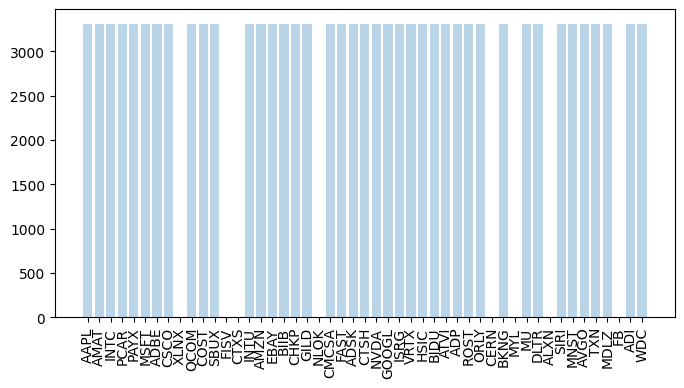

In [26]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [27]:
# create a list for dates with all ticker data points
date_list = list(data[data['tic']=='AMGN'].date)
# filter with date list
data_filtered = data[data['date'].isin(date_list)]

In [28]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data_filtered[data_filtered['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [29]:
data_points_df.tail()

,0,1
44,TXN,3311
45,MDLZ,3311
46,FB,0
47,ADI,3311
48,WDC,3311


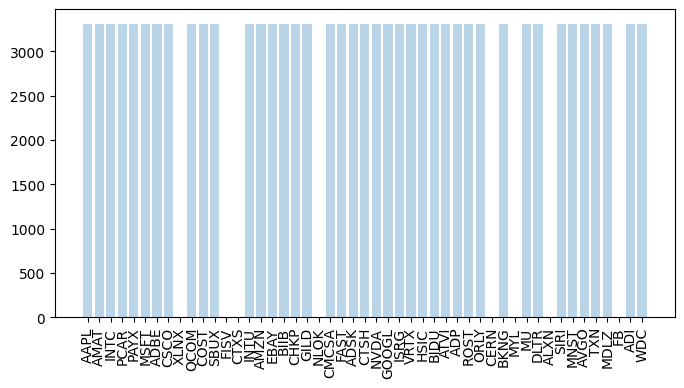

In [30]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [31]:
data_filtered.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0
1,2010-01-04,36.650002,37.299999,36.650002,37.090000,4710200,ADBE,0
2,2010-01-04,31.790001,32.189999,31.610001,22.743202,2102700,ADI,0
3,2010-01-04,38.226513,38.226513,37.489025,27.043213,3930120,ADP,0
4,2010-01-04,25.610001,25.830000,25.610001,25.670000,2228600,ADSK,0


In [32]:
data_filtered.tail()

,date,open,high,low,close,volume,tic,day
139057,2023-02-28,101.989998,102.949997,101.900002,101.045349,5186500,SBUX,1
139058,2023-02-28,4.470000,4.470000,4.370000,4.339775,14911800,SIRI,1
139059,2023-02-28,169.949997,172.570007,169.360001,167.418335,3674500,TXN,1
139060,2023-02-28,286.220001,291.559998,285.600006,290.290009,1510500,VRTX,1
139061,2023-02-28,38.830002,38.830002,38.270000,38.480000,3649400,WDC,1


# Save the Data to csv

In [33]:
data_filtered.to_csv('datasets/data.csv', index=False)

#  Creating a dataset for the Close Prices

In [34]:
# read the data from the saved csv file
df_prices = pd.read_csv('./datasets/data.csv')

In [35]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [36]:
len(tic_list)

42

In [37]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series

df_close = df_close.reset_index()


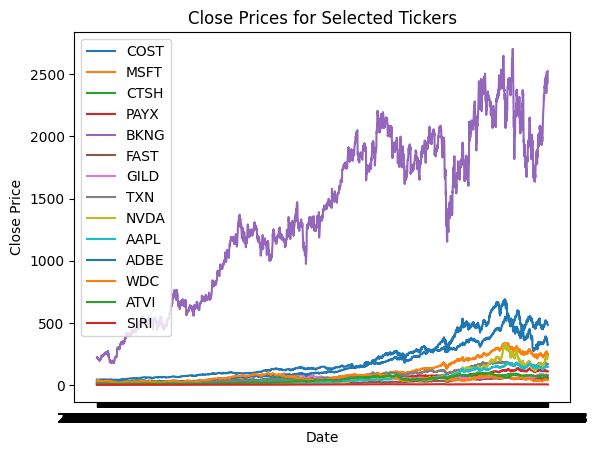

In [38]:
import matplotlib.pyplot as plt

# Create a list of tickers to plot (you can choose specific tickers)
tickers_to_plot = df_close.columns[1:15] #Example: First 15 tickers

# Plot the close prices for selected tickers
for ticker in tickers_to_plot:
  plt.plot(df_close['date'], df_close[ticker], label=ticker)

# Set labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices for Selected Tickers')
plt.legend(loc='best')

# Show the plot
plt.show()

In [39]:
df_close.head()

,date,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
0,2010-01-04,43.678864,23.522566,21.510445,19.421606,223.960007,7.360945,16.240316,18.196341,4.240800,...,15.512857,13.745549,44.240002,22.743202,32.908749,16.056667,11.248612,3.273333,27.537031,42.146580
1,2010-01-05,43.546501,23.530165,21.754045,19.409002,226.559998,7.513311,16.225311,18.091406,4.302728,...,15.792521,13.738960,42.779999,22.707300,33.700974,15.853333,11.162081,3.285833,27.537031,41.781490
2,2010-01-06,44.112625,23.385769,21.754045,19.566547,219.080002,8.008945,16.787907,17.958487,4.330250,...,16.000143,13.692872,42.029999,22.664209,33.371464,16.783333,11.138484,3.354167,27.152712,41.467499
3,2010-01-07,43.899403,23.142559,20.931316,19.875326,216.130005,8.145550,16.829166,18.014452,4.245389,...,16.212011,13.561214,41.500000,22.484671,34.338959,16.673332,11.020492,3.340833,27.063332,41.087811
4,2010-01-08,43.583267,23.302158,21.538023,19.887928,216.210007,8.227862,16.705399,18.427210,4.254564,...,16.233200,13.712626,40.669998,22.613935,34.682484,16.443333,11.445264,3.357500,27.778353,41.452911


In [40]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
COST,3311.0,192.758785,143.100823,39.671547,87.505085,137.312302,279.453049,601.479736
MSFT,3311.0,96.473747,89.671275,17.649080,26.106673,51.127117,138.920410,337.621094
CTSH,3311.0,52.308604,16.706461,19.819025,35.181988,54.902287,65.893562,90.775360
PAYX,3311.0,52.772820,31.213379,16.126373,26.098896,45.635357,72.119705,135.449768
BKNG,3311.0,1379.139121,644.726607,175.190002,735.735016,1360.000000,1906.975037,2703.260010
FAST,3311.0,24.921287,13.449582,7.217330,16.466708,19.051687,31.345861,61.304691
GILD,3311.0,51.228634,21.140496,11.938317,37.772797,57.044792,63.790058,92.005486
TXN,3311.0,73.780843,52.643617,15.821471,26.387438,55.816025,106.507660,188.637283
NVDA,3311.0,52.009402,70.900726,2.036686,3.736829,13.908813,62.447876,333.288818
AAPL,3311.0,50.359492,48.410112,5.821836,16.625800,27.748896,60.418715,180.190948


In [41]:
# Save the Close Price datasets

df_close.to_csv('datasets/close_prices.csv', index=False)

In [42]:
# Close prices for all the stocks
df_close_full_stocks = df_close

In [43]:
df_close_full_stocks.head()

,date,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
0,2010-01-04,43.678864,23.522566,21.510445,19.421606,223.960007,7.360945,16.240316,18.196341,4.240800,...,15.512857,13.745549,44.240002,22.743202,32.908749,16.056667,11.248612,3.273333,27.537031,42.146580
1,2010-01-05,43.546501,23.530165,21.754045,19.409002,226.559998,7.513311,16.225311,18.091406,4.302728,...,15.792521,13.738960,42.779999,22.707300,33.700974,15.853333,11.162081,3.285833,27.537031,41.781490
2,2010-01-06,44.112625,23.385769,21.754045,19.566547,219.080002,8.008945,16.787907,17.958487,4.330250,...,16.000143,13.692872,42.029999,22.664209,33.371464,16.783333,11.138484,3.354167,27.152712,41.467499
3,2010-01-07,43.899403,23.142559,20.931316,19.875326,216.130005,8.145550,16.829166,18.014452,4.245389,...,16.212011,13.561214,41.500000,22.484671,34.338959,16.673332,11.020492,3.340833,27.063332,41.087811
4,2010-01-08,43.583267,23.302158,21.538023,19.887928,216.210007,8.227862,16.705399,18.427210,4.254564,...,16.233200,13.712626,40.669998,22.613935,34.682484,16.443333,11.445264,3.357500,27.778353,41.452911


In [44]:
%store df_close_full_stocks

Stored 'df_close_full_stocks' (DataFrame)


In [45]:
ticker_list = df_close_full_stocks.columns

In [46]:
print(ticker_list)

Index(['date', 'COST', 'MSFT', 'CTSH', 'PAYX', 'BKNG', 'FAST', 'GILD', 'TXN',
       'NVDA', 'AAPL', 'ADBE', 'WDC', 'ATVI', 'SIRI', 'ISRG', 'AMZN', 'CHKP',
       'SBUX', 'ADSK', 'MU', 'MDLZ', 'ROST', 'ORLY', 'AVGO', 'HSIC', 'GOOGL',
       'CMCSA', 'BIIB', 'ADP', 'EBAY', 'BIDU', 'CSCO', 'PCAR', 'INTC', 'VRTX',
       'ADI', 'QCOM', 'DLTR', 'AMAT', 'MNST', 'INTU', 'AMGN'],
      dtype='object')


# Part 3: Stock selection

# Import Relevant Libraries

In [47]:


import numpy as np
import pandas as pd
import tensorflow as tf
import keras



In [48]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras import regularizers, optimizers

from sklearn import preprocessing

# LOAD DATA

In [49]:
# Load the close prices dataset
prices_data = pd.read_csv('./datasets/close_prices.csv')

In [50]:
df = prices_data.copy()

In [51]:
df = df.reset_index(drop=True).set_index(['date'])

In [52]:
df.head()

,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,43.678864,23.522566,21.510445,19.421606,223.960007,7.360945,16.240316,18.196341,4.240800,6.487535,...,15.512857,13.745549,44.240002,22.743202,32.908749,16.056667,11.248612,3.273333,27.537031,42.146580
2010-01-05,43.546501,23.530165,21.754045,19.409002,226.559998,7.513311,16.225311,18.091406,4.302728,6.498751,...,15.792521,13.738960,42.779999,22.707300,33.700974,15.853333,11.162081,3.285833,27.537031,41.781490
2010-01-06,44.112625,23.385769,21.754045,19.566547,219.080002,8.008945,16.787907,17.958487,4.330250,6.395380,...,16.000143,13.692872,42.029999,22.664209,33.371464,16.783333,11.138484,3.354167,27.152712,41.467499
2010-01-07,43.899403,23.142559,20.931316,19.875326,216.130005,8.145550,16.829166,18.014452,4.245389,6.383556,...,16.212011,13.561214,41.500000,22.484671,34.338959,16.673332,11.020492,3.340833,27.063332,41.087811
2010-01-08,43.583267,23.302158,21.538023,19.887928,216.210007,8.227862,16.705399,18.427210,4.254564,6.425994,...,16.233200,13.712626,40.669998,22.613935,34.682484,16.443333,11.445264,3.357500,27.778353,41.452911


#  Define Functions

In [53]:
def defineAutoencoder(num_stock, encoding_dim = 5, verbose=0):

    """
    Function for fitting an Autoencoder
    """

    # connect all layers
    input = Input(shape=(num_stock,))

    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.00001),name ='Encoder_Input')(input)

    decoded = Dense(num_stock, kernel_regularizer=regularizers.l2(0.00001), name ='Decoder_Input')(encoded)
    decoded = Activation("linear", name='Decoder_Activation_function')(decoded)

    # construct and compile AE model
    autoencoder = Model(inputs=input, outputs=decoded)
    adam = optimizers.Adam(lr=0.0005)
    autoencoder.compile(optimizer=adam, loss='mean_squared_error')
    if verbose!= 0:
        autoencoder.summary()

    return autoencoder

In [54]:
def getReconstructionErrorsDF(df_pct_change, reconstructed_data):

    """
    Function for calculating the reconstruction Errors
    """
    array = []
    stocks_ranked = []
    num_columns = reconstructed_data.shape[1]
    for i in range(0, num_columns):
        diff = np.linalg.norm((df_pct_change.iloc[:, i] - reconstructed_data[:, i]))  # 2 norm difference
        array.append(float(diff))

    ranking = np.array(array).argsort()
    r = 1
    for stock_index in ranking:
        stocks_ranked.append([ r
                              ,stock_index
                              ,df_pct_change.iloc[:, stock_index].name
                              ,array[stock_index]
                              ])
        r = r + 1

    columns = ['ranking','stock_index', 'stock_name' ,'recreation_error']
    df = pd.DataFrame(stocks_ranked, columns=columns)
    df = df.set_index('stock_name')
    return df



# Get the Percentage Change of the Close Prices

In [55]:
 col_names = df.columns.to_list()

print(col_names)



['COST', 'MSFT', 'CTSH', 'PAYX', 'BKNG', 'FAST', 'GILD', 'TXN', 'NVDA', 'AAPL', 'ADBE', 'WDC', 'ATVI', 'SIRI', 'ISRG', 'AMZN', 'CHKP', 'SBUX', 'ADSK', 'MU', 'MDLZ', 'ROST', 'ORLY', 'AVGO', 'HSIC', 'GOOGL', 'CMCSA', 'BIIB', 'ADP', 'EBAY', 'BIDU', 'CSCO', 'PCAR', 'INTC', 'VRTX', 'ADI', 'QCOM', 'DLTR', 'AMAT', 'MNST', 'INTU', 'AMGN']


In [56]:
df_pct_change = df.pct_change(1).astype(float)
df_pct_change = df_pct_change.replace([np.inf, -np.inf], np.nan)
df_pct_change = df_pct_change.fillna(method='ffill')

# the percentage change function will make the first two rows equal to nan
df_pct_change = df_pct_change.tail(len(df_pct_change) - 2)

df_pct_change.shape



<ipython-input-56-cfc943588635>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pct_change = df_pct_change.fillna(method='ffill')


(3309, 42)

In [57]:
# remove columns where there is no change over a longer time period
df_pct_change = df_pct_change[df_pct_change.columns[((df_pct_change == 0).mean() <= 0.05)]]

df_pct_change.head()



,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
date,,,,,,,,,,,,,,,,,,,,,
2010-01-06,0.013000,-0.006137,0.000000,0.008117,-0.033016,0.065967,0.034674,-0.007347,0.006396,-0.015906,...,0.013147,-0.003355,-0.017532,-0.001898,-0.009777,0.058663,-0.002114,0.020797,-0.013956,-0.007515
2010-01-07,-0.004834,-0.010400,-0.037820,0.015781,-0.013465,0.017057,0.002458,0.003116,-0.019597,-0.001849,...,0.013242,-0.009615,-0.012610,-0.007922,0.028992,-0.006554,-0.010593,-0.003975,-0.003292,-0.009156
2010-01-08,-0.007201,0.006896,0.028986,0.000634,0.000370,0.010105,-0.007354,0.022913,0.002161,0.006648,...,0.001307,0.011165,-0.020000,0.005749,0.010004,-0.013794,0.038544,0.004989,0.026420,0.008886
2010-01-11,0.001181,-0.012720,-0.008110,0.006020,0.012488,-0.019583,0.007858,-0.012908,-0.014017,-0.008821,...,0.016445,0.005761,0.028522,-0.005716,-0.003638,-0.005473,0.021993,0.000000,0.004504,0.004403
2010-01-12,-0.005392,-0.006607,0.015491,-0.003464,-0.022521,-0.000217,0.001337,-0.041923,-0.033899,-0.011375,...,-0.002825,-0.016230,-0.000956,-0.041520,-0.016230,0.011822,-0.045057,-0.007694,0.000000,-0.017362


#  Construct the Autoencoder

In [58]:
# define the input parameters
hidden_layers = 5
batch_size = 500
epochs = 500
stock_selection_number = 20
num_stock = df_pct_change.shape[1]
verbose = 1

In [59]:
print('-' * 20 + 'Step 1 : Returns vs. recreation error (recreation_error)')
print('-' * 25 + 'Transform dataset with MinMax Scaler')

--------------------Step 1 : Returns vs. recreation error (recreation_error)
-------------------------Transform dataset with MinMax Scaler


In [60]:
# Normalize the data
df_scaler = preprocessing.MinMaxScaler()
df_pct_change_normalised = df_scaler.fit_transform(df_pct_change)


In [61]:
# define autoencoder
print('-' * 25 + 'Define autoencoder model')
num_stock = len(df_pct_change.columns)
autoencoder = defineAutoencoder(num_stock=num_stock, encoding_dim=hidden_layers, verbose=verbose)
#plot_model(autoencoder, to_file='img/model_autoencoder_1.png', show_shapes=True,
#           show_layer_names=True)

-------------------------Define autoencoder model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 Encoder_Input (Dense)       (None, 5)                 210       
                                                                 
 Decoder_Input (Dense)       (None, 41)                246       
                                                                 
 Decoder_Activation_functio  (None, 41)                0         
 n (Activation)                                                  
                                                                 
Total params: 456 (1.78 KB)
Trainable params: 456 (1.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# train autoencoder
print('-' * 25 + 'Train autoencoder model')
autoencoder.fit(df_pct_change_normalised, df_pct_change_normalised, shuffle=False, epochs=epochs,
                batch_size=batch_size,
                verbose=verbose)


-------------------------Train autoencoder model
Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 0.3366
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2730
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2272
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1930
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1666
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1455
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1278
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1119
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0836
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 13/500

In [64]:
# predict autoencoder
print('-' * 25 + 'Predict autoencoder model')
reconstruct = autoencoder.predict(df_pct_change_normalised)

-------------------------Predict autoencoder model
104/104 [==============================] - 0s 2ms/step


In [65]:
# Inverse transform dataset with MinMax Scaler
print('-' * 25 + 'Inverse transform dataset with MinMax Scaler')
reconstruct_real = df_scaler.inverse_transform(reconstruct)
df_reconstruct_real = pd.DataFrame(data=reconstruct_real, columns=df_pct_change.columns)

-------------------------Inverse transform dataset with MinMax Scaler


In [66]:
print('-' * 25 + 'Calculate L2 norm as reconstruction loss metric')
df_recreation_error = getReconstructionErrorsDF(df_pct_change=df_pct_change,
                                                reconstructed_data=reconstruct_real)

-------------------------Calculate L2 norm as reconstruction loss metric


In [67]:
df_recreation_error

,ranking,stock_index,recreation_error
stock_name,,,
ADP,1,27,0.507500
PAYX,2,3,0.522705
MDLZ,3,19,0.588019
COST,4,0,0.597438
MSFT,5,1,0.614298
ADI,6,34,0.619550
FAST,7,5,0.631122
TXN,8,7,0.633849
GOOGL,9,24,0.648751


In [68]:
filtered_stocks = df_recreation_error.head(stock_selection_number).index

filtered_stocks



Index(['ADP', 'PAYX', 'MDLZ', 'COST', 'MSFT', 'ADI', 'FAST', 'TXN', 'GOOGL',
       'HSIC', 'AMGN', 'SBUX', 'INTU', 'PCAR', 'CMCSA', 'AAPL', 'ADBE', 'INTC',
       'CHKP', 'CSCO'],
      dtype='object', name='stock_name')

In [69]:
# store the list of selected stocks
%store filtered_stocks


Stored 'filtered_stocks' (Index)


# Part 4: Feature Engineering and Data Preprocessing

In [70]:
!pip install ta

In [71]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
#import finrl.preprocessing.data
#from finrl.preprocessing.data import data_split
#from finrl.preprocessing.preprocessors import FeatureEngineer

In [72]:
# Load the whole data set
data = pd.read_csv('./datasets/data.csv')

# Load the close prices dataset
prices_data = pd.read_csv('./datasets/close_prices.csv')

In [73]:
%store -r filtered_stocks

In [74]:
list_of_stocks = filtered_stocks
print(list_of_stocks)

Index(['ADP', 'PAYX', 'MDLZ', 'COST', 'MSFT', 'ADI', 'FAST', 'TXN', 'GOOGL',
       'HSIC', 'AMGN', 'SBUX', 'INTU', 'PCAR', 'CMCSA', 'AAPL', 'ADBE', 'INTC',
       'CHKP', 'CSCO'],
      dtype='object', name='stock_name')


In [75]:
data.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0
1,2010-01-04,36.650002,37.299999,36.650002,37.090000,4710200,ADBE,0
2,2010-01-04,31.790001,32.189999,31.610001,22.743202,2102700,ADI,0
3,2010-01-04,38.226513,38.226513,37.489025,27.043213,3930120,ADP,0
4,2010-01-04,25.610001,25.830000,25.610001,25.670000,2228600,ADSK,0


In [76]:
data = data[data['tic'].isin(list_of_stocks)]

In [77]:
data.tic.unique()

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'AMGN', 'CHKP', 'CMCSA', 'COST',
       'CSCO', 'FAST', 'GOOGL', 'HSIC', 'INTC', 'INTU', 'MDLZ', 'MSFT',
       'PAYX', 'PCAR', 'SBUX', 'TXN'], dtype=object)

#  Add Technical Indicators

In [78]:
# Define a Function for adding technical indicators

def add_features(data, feature_list, short_names):
    """
    Function to add technical indicators for features
    -Takes in a dataset with Open, High, Low, Close and Volume
    -Also takes in a list of the technical indicators to be added
     as well as a list of the shortened indicator names
    """

    # list of column names to filter the features
    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names

    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="open", high="high",
    low="low", close="close", volume="volume")

    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()

    return data

In [79]:
# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast',
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

#feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf','trend_macd']

# Short names of the features
#short_names = ['atr', 'bbw','obv','cmf','macd']


In [80]:
# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)

/usr/local/lib/python3.10/site-packages/ta/volume.py:319: RuntimeWarning: overflow encountered in double_scalars
  self._nvi.iloc[i] = self._nvi.iloc[i - 1] * (1.0 + price_change.iloc[i])


In [81]:
data_with_features.head()

,date,open,high,low,close,volume,tic,day,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
55,2010-01-05,33.560001,33.869999,32.750000,33.820000,3147500,CHKP,1,14.738955,209.165365,-123633723,-25.943958,4.271906,0.000000,22.374203,25.577702,56.103242,54.651652
56,2010-01-05,8.465000,8.490000,8.275000,6.351323,35493000,CMCSA,1,15.819560,209.319119,-159126723,-25.809775,2.421741,0.000000,21.793838,22.619798,-119.616038,45.520591
57,2010-01-05,59.259998,59.419998,58.840000,43.546501,2775800,COST,1,19.544471,209.126773,-156350923,-25.864014,3.911719,9.331188,23.462499,25.839290,196.088661,56.193644
58,2010-01-05,24.600000,24.730000,24.379999,16.935854,45124500,CSCO,1,19.506674,209.191063,-201475423,-27.241325,2.911717,8.770434,23.255353,24.469531,-22.003521,48.824050
62,2010-01-05,10.480000,10.737500,10.437500,7.513311,5797600,FAST,1,18.205842,208.936160,-207273023,-27.126570,1.343401,8.416419,22.588724,21.860882,-107.184807,46.498668


In [82]:
feature_list = list(data_with_features.columns)[7:]

In [83]:
print(feature_list)

['day', 'atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


# Add Covariance Matrix

In [84]:
def add_cov_matrix(df):
    """
    Function to add Coveriance Matrices as part of the defined states
    """
    # Sort the data and index by date and tic
    df=df.sort_values(['date','tic'],ignore_index=True)
    df.index = df.date.factorize()[0]

    cov_list = [] # create empty list for storing coveriance matrices at each time step

    # look back for constructing the coveriance matrix is one year
    lookback=252
    for i in range(lookback,len(df.index.unique())):
        data_lookback = df.loc[i-lookback:i,:]
        price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
        return_lookback = price_lookback.pct_change().dropna()
        covs = return_lookback.cov().values
        covs = covs#/covs.max()
        cov_list.append(covs)

    df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
    df = df.merge(df_cov, on='date')
    df = df.sort_values(['date','tic']).reset_index(drop=True)

    return df


In [85]:
# Add Covariance Matrices to our dataset
data_with_features_covs = data_with_features.copy()
data_with_features_covs = add_cov_matrix(data_with_features_covs)

data_with_features_covs.head()



,date,open,high,low,close,volume,tic,day,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2011-01-04,11.872857,11.875000,11.719643,10.042778,309080800,AAPL,1,16.122836,208.087441,-146175916282,-27.064690,-2.013767,4.931674,19.938626,20.387036,-104.910599,46.552490,"[[0.00028487785754404104, 0.000143676793680554..."
1,2011-01-04,31.280001,31.650000,31.180000,31.510000,8038100,ADBE,1,16.671275,208.087998,-146167878182,-26.993028,-0.977297,4.705894,21.653005,22.098261,11.818324,52.239307,"[[0.00028487785754404104, 0.000143676793680554..."
2,2011-01-04,38.200001,38.200001,37.419998,27.715345,2907600,ADI,1,15.673147,208.157867,-146170785782,-27.051694,-0.456818,4.703036,22.702294,22.962428,29.144603,51.202228,"[[0.00028487785754404104, 0.000143676793680554..."
3,2011-01-04,41.229149,41.387180,41.071114,30.578329,3259818,ADP,1,15.473016,208.162868,-146167525964,-27.206162,0.184556,4.803953,23.198855,24.134105,47.855530,51.976861,"[[0.00028487785754404104, 0.000143676793680554..."
4,2011-01-04,55.770000,57.240002,55.689999,41.438293,8429500,AMGN,1,16.591882,208.693250,-146159096464,-27.107017,1.551277,5.402853,25.472932,26.796288,126.674300,54.901375,"[[0.00028487785754404104, 0.000143676793680554..."


#  Store the Dataframe

In [86]:
df = data_with_features_covs

In [87]:
%store df

Stored 'df' (DataFrame)


# Part 5: Feature Reduction

In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [89]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

from sklearn import preprocessing

# Load the Data

In [90]:
%store -r df

In [91]:

df.head()


,date,open,high,low,close,volume,tic,day,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2011-01-04,11.872857,11.875000,11.719643,10.042778,309080800,AAPL,1,16.122836,208.087441,-146175916282,-27.064690,-2.013767,4.931674,19.938626,20.387036,-104.910599,46.552490,"[[0.00028487785754404104, 0.000143676793680554..."
1,2011-01-04,31.280001,31.650000,31.180000,31.510000,8038100,ADBE,1,16.671275,208.087998,-146167878182,-26.993028,-0.977297,4.705894,21.653005,22.098261,11.818324,52.239307,"[[0.00028487785754404104, 0.000143676793680554..."
2,2011-01-04,38.200001,38.200001,37.419998,27.715345,2907600,ADI,1,15.673147,208.157867,-146170785782,-27.051694,-0.456818,4.703036,22.702294,22.962428,29.144603,51.202228,"[[0.00028487785754404104, 0.000143676793680554..."
3,2011-01-04,41.229149,41.387180,41.071114,30.578329,3259818,ADP,1,15.473016,208.162868,-146167525964,-27.206162,0.184556,4.803953,23.198855,24.134105,47.855530,51.976861,"[[0.00028487785754404104, 0.000143676793680554..."
4,2011-01-04,55.770000,57.240002,55.689999,41.438293,8429500,AMGN,1,16.591882,208.693250,-146159096464,-27.107017,1.551277,5.402853,25.472932,26.796288,126.674300,54.901375,"[[0.00028487785754404104, 0.000143676793680554..."


In [92]:
# Get the list of all the features
features_list = list(df.columns)[7:-1]

print(features_list)

['day', 'atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


#  Construct a Data Frame of Features Construct a Data Frame of Features

In [93]:
# construct a data frame of features
features_df = df[features_list]
features_df.index = df['date']

features_df.head()



,day,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,,
2011-01-04,1,16.122836,208.087441,-146175916282,-27.064690,-2.013767,4.931674,19.938626,20.387036,-104.910599,46.552490
2011-01-04,1,16.671275,208.087998,-146167878182,-26.993028,-0.977297,4.705894,21.653005,22.098261,11.818324,52.239307
2011-01-04,1,15.673147,208.157867,-146170785782,-27.051694,-0.456818,4.703036,22.702294,22.962428,29.144603,51.202228
2011-01-04,1,15.473016,208.162868,-146167525964,-27.206162,0.184556,4.803953,23.198855,24.134105,47.855530,51.976861
2011-01-04,1,16.591882,208.693250,-146159096464,-27.107017,1.551277,5.402853,25.472932,26.796288,126.674300,54.901375


In [94]:
features_df.shape

(61160, 11)

In [95]:
df.shape

(61160, 19)

# Normalize the Features and Construct an Autoencoder

In [96]:
features_array = np.array(features_df)

features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)

In [97]:
features_normalised.shape

(61160, 11)

In [98]:
# rescale the features array
features_normalised = features_normalised.reshape(-1,20,11)

features_normalised.shape

(3058, 20, 11)

In [99]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,11)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(11)))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
96/96 [==============================] - 10s 36ms/step - loss: 0.0697
Epoch 2/100
96/96 [==============================] - 3s 36ms/step - loss: 0.0182
Epoch 3/100
96/96 [==============================] - 3s 32ms/step - loss: 0.0127
Epoch 4/100
96/96 [==============================] - 2s 23ms/step - loss: 0.0108
Epoch 5/100
96/96 [==============================] - 3s 35ms/step - loss: 0.0097
Epoch 6/100
96/96 [==============================] - 3s 36ms/step - loss: 0.0089
Epoch 7/100
96/96 [==============================] - 3s 36ms/step - loss: 0.0083
Epoch 8/100
96/96 [==============================] - 3s 33ms/step - loss: 0.0077
Epoch 9/100
96/96 [==============================] - 2s 22ms/step - loss: 0.0073
Epoch 10/100
96/96 [==============================] - 3s 33ms/step - loss: 0.0070
Epoch 11/100
96/96 [==============================] - 3s 28ms/step - loss: 0.0066
Epoch 12/100
96/96 [==============================] - 3s 28ms/step - loss: 0.0061
Epoch 13/100
96/96 [====

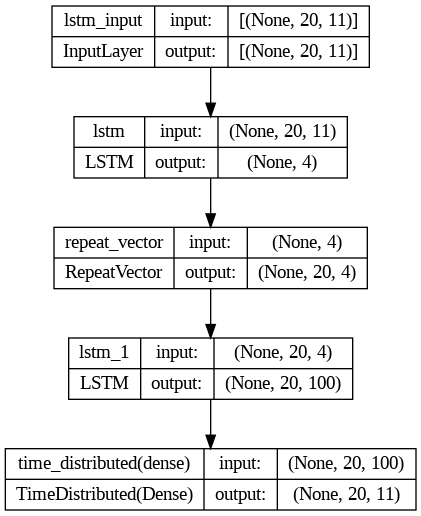

In [100]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)
plot_model(model, show_shapes=True, to_file='./results/reconstruct_lstm_autoencoder.png')

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 256       
                                                                 
 repeat_vector (RepeatVecto  (None, 20, 4)             0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 20, 100)           42000     
                                                                 
 time_distributed (TimeDist  (None, 20, 11)            1111      
 ributed)                                                        
                                                                 
Total params: 43367 (169.40 KB)
Trainable params: 43367 (169.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


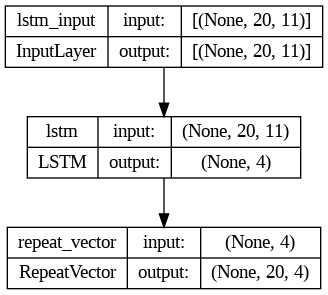

In [102]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)
plot_model(model_feature, show_shapes=True, show_layer_names=True, to_file='./results/lstm_encoder.png')

# Get the Reconstructed Features

In [103]:
# get the feature vector for the input sequence
yhat = model_feature.predict(features_normalised)
print(yhat.shape)


96/96 [==============================] - 0s 3ms/step
(3058, 20, 4)


In [104]:
# reshape the vector
features_reduced = yhat.reshape(-1,4)


In [105]:
df.shape

(61160, 19)

In [106]:
features_reduced.shape

(61160, 4)

In [107]:
# Copy original data frame and drop the original features
df_reduced = df.copy()
df_reduced = df_reduced .drop(features_list, axis=1)



In [108]:
df_reduced.head()

,date,open,high,low,close,volume,tic,cov_list
0,2011-01-04,11.872857,11.875000,11.719643,10.042778,309080800,AAPL,"[[0.00028487785754404104, 0.000143676793680554..."
1,2011-01-04,31.280001,31.650000,31.180000,31.510000,8038100,ADBE,"[[0.00028487785754404104, 0.000143676793680554..."
2,2011-01-04,38.200001,38.200001,37.419998,27.715345,2907600,ADI,"[[0.00028487785754404104, 0.000143676793680554..."
3,2011-01-04,41.229149,41.387180,41.071114,30.578329,3259818,ADP,"[[0.00028487785754404104, 0.000143676793680554..."
4,2011-01-04,55.770000,57.240002,55.689999,41.438293,8429500,AMGN,"[[0.00028487785754404104, 0.000143676793680554..."


In [109]:
# convert the reduced features to a data frame and merge with the original data frame
features_reduced_df = pd.DataFrame(features_reduced, columns=['f01','f02','f03','f04'])

features_reduced_df.head()

,f01,f02,f03,f04
0,0.7013,9.292645,0.691043,0.743152
1,0.7013,9.292645,0.691043,0.743152
2,0.7013,9.292645,0.691043,0.743152
3,0.7013,9.292645,0.691043,0.743152
4,0.7013,9.292645,0.691043,0.743152


In [111]:
df_reduced[['f01','f02','f03','f04']] = features_reduced_df[['f01','f02','f03','f04']]

In [112]:
df_reduced.head()

,date,open,high,low,close,volume,tic,cov_list,f01,f02,f03,f04
0,2011-01-04,11.872857,11.875000,11.719643,10.042778,309080800,AAPL,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
1,2011-01-04,31.280001,31.650000,31.180000,31.510000,8038100,ADBE,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
2,2011-01-04,38.200001,38.200001,37.419998,27.715345,2907600,ADI,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
3,2011-01-04,41.229149,41.387180,41.071114,30.578329,3259818,ADP,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
4,2011-01-04,55.770000,57.240002,55.689999,41.438293,8429500,AMGN,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152


In [113]:
data_df = df_reduced.copy()

In [114]:
%store data_df

Stored 'data_df' (DataFrame)


# Part 6: Data splitting

We split both the close prices and the whole dataset into train and test (trade). 80% for training and 20% for testing.

In [115]:

import pandas as pd
import numpy as np
import ta
#from ta import add_all_ta_features
from ta.utils import dropna
# from finrl.preprocessing.data import data_split
# from finrl.preprocessing.preprocessors import FeatureEngineer

# Load the data

In [116]:
%store -r data_df
%store -r filtered_stocks
%store -r df_close_full_stocks

In [117]:
data_df.head()

,date,open,high,low,close,volume,tic,cov_list,f01,f02,f03,f04
0,2011-01-04,11.872857,11.875000,11.719643,10.042778,309080800,AAPL,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
1,2011-01-04,31.280001,31.650000,31.180000,31.510000,8038100,ADBE,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
2,2011-01-04,38.200001,38.200001,37.419998,27.715345,2907600,ADI,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
3,2011-01-04,41.229149,41.387180,41.071114,30.578329,3259818,ADP,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
4,2011-01-04,55.770000,57.240002,55.689999,41.438293,8429500,AMGN,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152


In [118]:
df_close_full_stocks.head()

,date,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
0,2010-01-04,43.678864,23.522566,21.510445,19.421606,223.960007,7.360945,16.240316,18.196341,4.240800,...,15.512857,13.745549,44.240002,22.743202,32.908749,16.056667,11.248612,3.273333,27.537031,42.146580
1,2010-01-05,43.546501,23.530165,21.754045,19.409002,226.559998,7.513311,16.225311,18.091406,4.302728,...,15.792521,13.738960,42.779999,22.707300,33.700974,15.853333,11.162081,3.285833,27.537031,41.781490
2,2010-01-06,44.112625,23.385769,21.754045,19.566547,219.080002,8.008945,16.787907,17.958487,4.330250,...,16.000143,13.692872,42.029999,22.664209,33.371464,16.783333,11.138484,3.354167,27.152712,41.467499
3,2010-01-07,43.899403,23.142559,20.931316,19.875326,216.130005,8.145550,16.829166,18.014452,4.245389,...,16.212011,13.561214,41.500000,22.484671,34.338959,16.673332,11.020492,3.340833,27.063332,41.087811
4,2010-01-08,43.583267,23.302158,21.538023,19.887928,216.210007,8.227862,16.705399,18.427210,4.254564,...,16.233200,13.712626,40.669998,22.613935,34.682484,16.443333,11.445264,3.357500,27.778353,41.452911


In [119]:
# Close Prices data frame

# Reset the Index to tic and date
df_prices = data_df.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in filtered_stocks:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series

In [120]:
df_close.head()

,ADP,PAYX,MDLZ,COST,MSFT,ADI,FAST,TXN,GOOGL,HSIC,AMGN,SBUX,INTU,PCAR,CMCSA,AAPL,ADBE,INTC,CHKP,CSCO
date,,,,,,,,,,,,,,,,,,,,
2011-01-04,30.578329,20.237207,15.930244,53.892651,21.793549,27.715345,10.752315,23.288725,15.068068,24.329412,41.438293,13.021222,44.053890,24.555176,8.686808,10.042778,31.510000,14.352954,46.880001,14.138480
2011-01-05,31.067533,20.757126,15.894957,52.894199,21.723724,27.774441,10.799045,23.381392,15.241992,24.313725,41.423691,12.969104,43.562302,24.770075,8.802939,10.124931,32.220001,14.210444,48.360001,14.310733
2011-01-06,31.308880,20.980888,15.763884,52.640884,22.359924,27.929569,10.671429,23.702175,15.352853,24.572550,41.292259,12.812757,43.169052,24.705608,8.810684,10.116746,32.270000,14.095078,46.720001,14.434757
2011-01-07,31.380632,20.974304,15.723556,52.640884,22.189238,27.767052,10.655251,23.680790,15.426426,24.529411,41.606239,13.141492,43.249496,24.383244,8.787455,10.189198,32.040001,14.020429,45.790001,14.448540
2011-01-10,31.393677,21.059855,15.733639,52.514191,21.894411,27.848307,10.644462,23.794847,15.370621,24.533333,41.211937,13.137481,42.677490,24.615347,8.795197,10.381085,32.959999,14.040783,44.900002,14.324508


In [121]:
df_close = df_close.reset_index()

# Split the Data

In [122]:
# Define the start and end dates for the train and test data

train_pct = 0.8 # percentage of train data
date_list = list(data_df.date.unique()) # List of dates in the data

date_list_len = len(date_list) # len of the date list
train_data_len = int(train_pct * date_list_len) # length of the train data

train_start_date = date_list[0]
train_end_date = date_list[train_data_len]

test_start_date = date_list[train_data_len+1]
test_end_date = date_list[-1]

In [123]:
print('Training Data: ', 'from ', train_start_date, ' to ', train_end_date)

Training Data:  from  2011-01-04  to  2020-09-23


In [124]:
print('Testing Data: ', 'from ', test_start_date, ' to ', test_end_date)

Testing Data:  from  2020-09-24  to  2023-02-28


In [125]:
# Split the whole dataset
train_data = data_split(data_df, train_start_date, train_end_date)
test_data = data_split(data_df, test_start_date, test_end_date)

# Split the Close Prices dataset
prices_train_data = df_close[df_close['date']<=train_end_date]
prices_test_data = df_close[df_close['date']>=test_start_date]

# split the Close Prices of all stocks
prices_full_train = df_close_full_stocks[df_close_full_stocks['date']<=train_end_date]
prices_full_test = df_close_full_stocks[df_close_full_stocks['date']>=test_start_date]

# Store the Dataframes

In [126]:
prices_train = prices_train_data.copy()
prices_test = prices_test_data.copy()

train_df = train_data.copy()
test_df = test_data.copy()

prices_full_train_df = prices_full_train.copy()
prices_full_test_df = prices_full_test.copy()


In [127]:
%store prices_train
%store prices_test

%store train_df
%store test_df

%store prices_full_train_df
%store prices_full_test_df

Stored 'prices_train' (DataFrame)
Stored 'prices_test' (DataFrame)
Stored 'train_df' (DataFrame)
Stored 'test_df' (DataFrame)
Stored 'prices_full_train_df' (DataFrame)
Stored 'prices_full_test_df' (DataFrame)


# Part 7: Uniform Weights and Maximum Sharpe Strategies
Two allocation strategies which will be used for comparision with the proposed Deep Reinforcement Learning (DRL) methodology are introduced.

The two strategies are:

1.Uniform Weights Strategy. This is a naive method where the weights of the assets are distributed equally among the assets in the portfolio.

2.Maximum Sharpe Strategy. This is an optimization strategy where the allocation is based on achieving the maximum possible risk based return (Sharpe Ratio). We will make use of the PyPotfolioOpt Library which is a library that implements portfolio optimisation methods.



In [128]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import display, HTML
from datetime import datetime


In [129]:
!pip install pyportfolioopt

In [130]:
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#  Load the Train and Test Data for Close Prices

In [131]:
%store -r prices_full_train_df
%store -r prices_full_test_df

In [132]:
prices_train_df = prices_full_train_df.copy()
prices_test_df = prices_full_test_df.copy()

In [133]:
prices_train_df = prices_train_df.reset_index(drop=True).set_index(['date'])
prices_test_df = prices_test_df.reset_index(drop=True).set_index(['date'])

prices_train_df.head()

,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,43.678864,23.522566,21.510445,19.421606,223.960007,7.360945,16.240316,18.196341,4.240800,6.487535,...,15.512857,13.745549,44.240002,22.743202,32.908749,16.056667,11.248612,3.273333,27.537031,42.146580
2010-01-05,43.546501,23.530165,21.754045,19.409002,226.559998,7.513311,16.225311,18.091406,4.302728,6.498751,...,15.792521,13.738960,42.779999,22.707300,33.700974,15.853333,11.162081,3.285833,27.537031,41.781490
2010-01-06,44.112625,23.385769,21.754045,19.566547,219.080002,8.008945,16.787907,17.958487,4.330250,6.395380,...,16.000143,13.692872,42.029999,22.664209,33.371464,16.783333,11.138484,3.354167,27.152712,41.467499
2010-01-07,43.899403,23.142559,20.931316,19.875326,216.130005,8.145550,16.829166,18.014452,4.245389,6.383556,...,16.212011,13.561214,41.500000,22.484671,34.338959,16.673332,11.020492,3.340833,27.063332,41.087811
2010-01-08,43.583267,23.302158,21.538023,19.887928,216.210007,8.227862,16.705399,18.427210,4.254564,6.425994,...,16.233200,13.712626,40.669998,22.613935,34.682484,16.443333,11.445264,3.357500,27.778353,41.452911


In [134]:
prices_test_df.head()

,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
date,,,,,,,,,,,,,,,,,,,,,
2020-09-24,330.817841,197.759750,64.017975,70.071335,1650.569946,40.676525,54.850994,125.026428,123.176773,106.298622,...,49.750370,44.858894,263.130005,106.770454,105.234650,88.430000,56.286812,39.000000,302.302124,218.633316
2020-09-25,326.603943,202.266006,65.147148,71.723648,1657.770020,41.227699,54.850994,126.517349,128.421341,110.286530,...,50.579952,45.570656,268.179993,107.528496,107.401436,89.419998,56.715366,39.395000,312.010193,221.817459
2020-09-28,333.315643,203.842697,66.333740,73.459045,1700.400024,42.045280,55.379669,129.828461,130.029907,112.918938,...,52.408653,46.930294,267.730011,110.920738,111.125328,90.940002,57.815979,40.255001,318.916595,224.737793
2020-09-29,335.718170,201.720947,66.027519,73.080566,1672.979980,41.641079,54.718815,129.426010,131.932739,112.064392,...,52.166443,46.711288,270.309998,110.532234,110.102898,89.870003,58.098431,39.895000,317.045471,225.893173
2020-09-30,338.444855,204.708923,66.429413,73.634438,1710.680054,41.420612,55.679260,130.605896,134.972733,113.753860,...,51.639629,47.249664,272.119995,110.617523,110.384300,91.339996,57.903633,40.099998,319.563110,231.224396


# Uniform Weights Portfolio

In [135]:
# Define a Function for Displaying the Cleaned Weights
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [136]:
ticker_list = list(prices_train_df.columns) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = ticker_list)

print("\nuniform weights portfolio:\n")
show_clean_p(uniform_weights_port)



uniform weights portfolio:



,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,ADBE,WDC,ATVI,SIRI,ISRG,AMZN,CHKP,SBUX,ADSK,MU,MDLZ,ROST,ORLY,AVGO,HSIC,GOOGL,CMCSA,BIIB,ADP,EBAY,BIDU,CSCO,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
0,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%,2.381%


In [137]:
uniform_weights

array([0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952])

In [138]:
# Plotting the Daily Draw Down

ticker_symb = ['GOOGL']
prices = prices_train_df[ticker_symb]
window = 250

def get_daily_max_drawdown(prices, window):
    max_rolling = prices.rolling(min_periods=1, window=window).max()
    daily_drawdown = (prices / max_rolling) - 1
    max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=window).min()
    return daily_drawdown,max_daily_drawdown

max_rolling = prices.rolling(min_periods=1, window=window).max()

daily_drawdown, max_daily_drawdown = get_daily_max_drawdown(prices, window)
daily_drawdown.name = "{} daily drawdown".format(ticker_symb)
#daily_drawdown = pd.DataFrame(daily_drawdown)

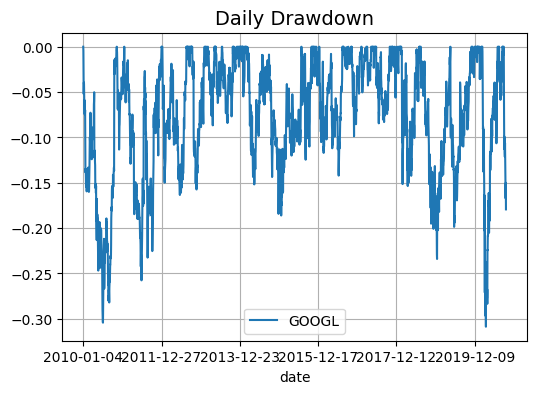

In [139]:
fig, ax = plt.subplots(figsize=(6,4))
daily_drawdown.plot(ax=ax);
ax.set_title("Daily Drawdown", fontsize=14)
plt.legend(loc="best");
plt.grid(True)
plt.show()

fig.savefig('results/daily_drawdown.png');

In [140]:

# Using the average daily return to calculate portfolio return

returns = prices_train_df.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values

uw_returns = np.dot(mean_daily_returns, uniform_weights)

print("uniform weights portfolio average daily return = {:.4%}".format(uw_returns))



uniform weights portfolio average daily return = 0.0850%


In [141]:
prices_train_df.index[-1]

'2020-09-23'

In [142]:
pd.to_datetime(prices_train_df.index)[0]

Timestamp('2010-01-04 00:00:00')

In [143]:
 np.timedelta64(1, 'M')

numpy.timedelta64(1,'M')

In [144]:
#Annualized Return, Variance and Standard Deviation

def get_annualized_return(prices, weigths):
    months = (pd.to_datetime(prices_train_df.index)[-1] - pd.to_datetime(prices_train_df.index)[0]) / np.timedelta64(1, 'h')
    months = np.floor(months)
    total_return = (prices.iloc[-1].dot(weigths) - prices.iloc[0].dot(weigths)) / prices.iloc[0].dot(weigths)
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return


uw_annual_return = get_annualized_return(prices_train_df, uniform_weights)

def get_portfolio_variance(returns, weigths):
    covariance_returns = returns.cov() * 250
    return np.dot(weigths.T, np.dot(covariance_returns, weigths))

uw_var = get_portfolio_variance(returns, uniform_weights)

print("uniform weights portfolio annualized return = {:.4%}".format(uw_annual_return))
print("uniform weights portfolio annualized variance = {:.1%}".format(uw_var))
print("uniform weights portfolio annualized std = {:.1%}".format(np.sqrt(uw_var)))

uniform weights portfolio annualized return = 0.0240%
uniform weights portfolio annualized variance = 3.7%
uniform weights portfolio annualized std = 19.2%


In [145]:
# Sharpe ratio

uniform_returns = returns.dot(uniform_weights)

rfr = 0.04 #Risk free rate

uw_vol = uniform_returns.std() * np.sqrt(250)

uw_sharpe_ratio = ((uw_annual_return  - rfr) / uw_vol)

print("uniform weights portfolio sharpe ratio = {:.2f}".format(uw_sharpe_ratio))


uniform weights portfolio sharpe ratio = -0.21


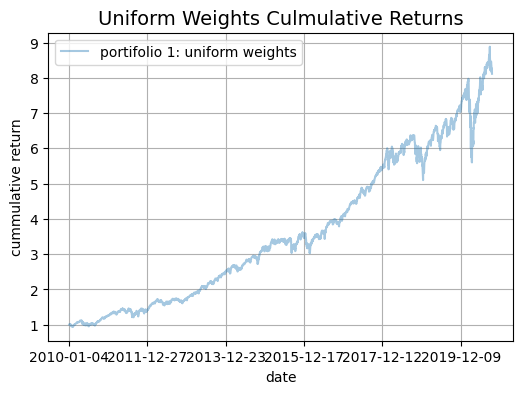

In [146]:
# Plotting the cummulative return
uniform_cum_returns = (1 + uniform_returns).cumprod()
uniform_cum_returns.name = "portifolio 1: uniform weights"

fig, ax = plt.subplots(figsize=(6,4))
uniform_cum_returns.plot(ax=ax, alpha=0.4);

plt.legend(loc="best");
plt.grid(True)
ax.set_ylabel("cummulative return");
ax.set_title('Uniform Weights Culmulative Returns', fontsize=14)

fig.savefig('results/uniform_weights_portfolio.png');


#  Maximum Sharpe Portfolio

In [147]:
mu = expected_returns.mean_historical_return(prices_train_df)
Sigma = risk_models.sample_cov(prices_train_df)
ef = EfficientFrontier(mu,Sigma)
ef.add_objective(objective_functions.L2_reg, gamma=1)

raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
max_sharpe_portfolio = pd.DataFrame(cleaned_weights, index=[0])

print("max sharpe portfolio:")
show_clean_p(max_sharpe_portfolio)

_ = ef.portfolio_performance(verbose=True, risk_free_rate=rfr)

print()

max sharpe portfolio:


/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,ADBE,WDC,ATVI,SIRI,ISRG,AMZN,CHKP,SBUX,ADSK,MU,MDLZ,ROST,ORLY,AVGO,HSIC,GOOGL,CMCSA,BIIB,ADP,EBAY,BIDU,CSCO,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
0,4.366%,3.255%,0.000%,0.674%,2.556%,2.017%,0.972%,2.197%,6.439%,6.008%,4.408%,0.000%,3.439%,3.410%,2.282%,7.107%,0.889%,3.639%,2.258%,0.000%,1.666%,4.205%,5.447%,6.551%,0.025%,1.075%,3.063%,1.828%,1.374%,1.852%,0.000%,0.000%,0.000%,0.000%,1.691%,0.626%,0.000%,2.736%,0.226%,5.163%,4.247%,2.306%


Expected annual return: 24.3%
Annual volatility: 19.2%
Sharpe Ratio: 1.16



/usr/local/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


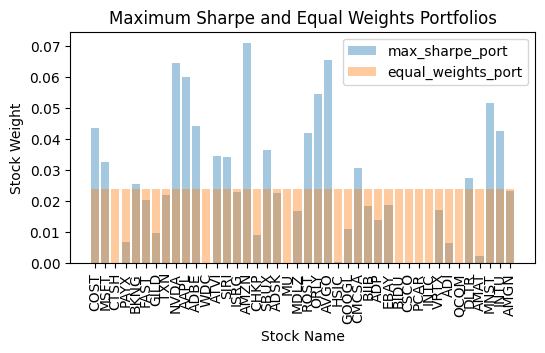

In [148]:
plt.subplots(figsize=(6,3))
plt.title('Maximum Sharpe and Equal Weights Portfolios')
plt.bar(max_sharpe_portfolio.T.index, max_sharpe_portfolio.T[0], alpha=0.4, label='max_sharpe_port')
plt.bar(uniform_weights_port.T.index, uniform_weights_port.T[0], alpha=0.4, label='equal_weights_port')
plt.xlabel('Stock Name')
plt.ylabel('Stock Weight')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [149]:
prices_train_df.head()

,COST,MSFT,CTSH,PAYX,BKNG,FAST,GILD,TXN,NVDA,AAPL,...,PCAR,INTC,VRTX,ADI,QCOM,DLTR,AMAT,MNST,INTU,AMGN
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,43.678864,23.522566,21.510445,19.421606,223.960007,7.360945,16.240316,18.196341,4.240800,6.487535,...,15.512857,13.745549,44.240002,22.743202,32.908749,16.056667,11.248612,3.273333,27.537031,42.146580
2010-01-05,43.546501,23.530165,21.754045,19.409002,226.559998,7.513311,16.225311,18.091406,4.302728,6.498751,...,15.792521,13.738960,42.779999,22.707300,33.700974,15.853333,11.162081,3.285833,27.537031,41.781490
2010-01-06,44.112625,23.385769,21.754045,19.566547,219.080002,8.008945,16.787907,17.958487,4.330250,6.395380,...,16.000143,13.692872,42.029999,22.664209,33.371464,16.783333,11.138484,3.354167,27.152712,41.467499
2010-01-07,43.899403,23.142559,20.931316,19.875326,216.130005,8.145550,16.829166,18.014452,4.245389,6.383556,...,16.212011,13.561214,41.500000,22.484671,34.338959,16.673332,11.020492,3.340833,27.063332,41.087811
2010-01-08,43.583267,23.302158,21.538023,19.887928,216.210007,8.227862,16.705399,18.427210,4.254564,6.425994,...,16.233200,13.712626,40.669998,22.613935,34.682484,16.443333,11.445264,3.357500,27.778353,41.452911


# store dataframes

In [150]:
%store max_sharpe_portfolio
%store uniform_weights_port

%store prices_train_df
%store prices_test_df

Stored 'max_sharpe_portfolio' (DataFrame)
Stored 'uniform_weights_port' (DataFrame)
Stored 'prices_train_df' (DataFrame)
Stored 'prices_test_df' (DataFrame)


# Part 8:Introducing Deep Reinforcement Learning Portfolios

In [151]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
matplotlib.use('Agg')
import datetime

#from pypfopt.efficient_frontier import EfficientFrontier, objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns


In [152]:
!pip install backtest

In [153]:
# Imports from the FinRL Library

#from config import config
#from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat
#from backtest import backtest_strat, baseline_strat

In [154]:
%store -r train_df
%store -r test_df

In [155]:
tech_indicator_list = ['f01','f02','f03','f04']

In [156]:
train_df.head()

,date,open,high,low,close,volume,tic,cov_list,f01,f02,f03,f04
0,2011-01-04,11.872857,11.875000,11.719643,10.042778,309080800,AAPL,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
0,2011-01-04,31.280001,31.650000,31.180000,31.510000,8038100,ADBE,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
0,2011-01-04,38.200001,38.200001,37.419998,27.715345,2907600,ADI,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
0,2011-01-04,41.229149,41.387180,41.071114,30.578329,3259818,ADP,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152
0,2011-01-04,55.770000,57.240002,55.689999,41.438293,8429500,AMGN,"[[0.00028487785754404104, 0.000143676793680554...",0.7013,9.292645,0.691043,0.743152


#  Implement DRL Algorithms

In [157]:
!pip install env
#!pip install models

  Preparing metadata (setup.py) ... done
  Created wheel for env: filename=env-0.1.0-py3-none-any.whl size=2015 sha256=d17fd0532baa07fb645e0984009763755d7863d9d5a43c2e7bfb99be985dc10b
  Stored in directory: /root/.cache/pip/wheels/f2/0a/55/c971729efb2d554c110d5d852b0e891e44da5ae8503208228e
Successfully built env


In [158]:
stock_dimension = len(train_df.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 20, State Space: 20


In [159]:
weights_initial = [1/stock_dimension]*stock_dimension



In [160]:
env_kwargs = {
    "hmax": 500,
    "initial_amount": 1000000,
    "transaction_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": tech_indicator_list,
    "action_space": stock_dimension,
    "reward_scaling": 0,
    'initial_weights': [1/stock_dimension]*stock_dimension
}

In [161]:
# @title Environment
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                initial_weights,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.initial_weights = initial_weights

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))

        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]

    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:


            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data


            """
            # Get data frame of close prices
            # Reset the Index to tic and date
            df_prices = self.data.copy()
            df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
            tic_list = list(set([i for i,j in df_prices.index]))

            # Get all the Close Prices
            df_close = pd.DataFrame()
            for ticker in tic_list:
                series = df_prices.xs(ticker).close
                df_close[ticker] = series

            mu = expected_returns.mean_historical_return(df_close)
            Sigma = risk_models.sample_cov(df_close)
            ef = EfficientFrontier(mu,Sigma)

            raw_weights = ef.max_sharpe()
            weights = [j for i,j in raw_weights.items()]
            self.actions_memory.append(weights)
            last_day_memory = self.data

            """

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]

        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def initial_weights(self, data_frame):
        # Get data frame of close prices
        # Reset the Index to tic and date
        df_prices = data_frame.copy()
        df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
        tic_list = list(set([i for i,j in df_prices.index]))

        # Get all the Close Prices
        df_close = pd.DataFrame()
        for ticker in tic_list:
            series = df_prices.xs(ticker).close
            df_close[ticker] = series

        mu = expected_returns.mean_historical_return(df_close)
        Sigma = risk_models.sample_cov(df_close)
        ef = EfficientFrontier(mu,Sigma, weight_bounds=(0.01, 1))

        raw_weights = ef.max_sharpe()
        initial_weights = [j for i,j in raw_weights.items()]

        return initial_weights

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [162]:
e_train_gym = StockPortfolioEnv(df = train_df, **env_kwargs)

In [163]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))



<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


# PPO

In [164]:
# initialize
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [165]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000)

----------------------------------
| time/              |           |
|    fps             | 244       |
|    iterations      | 1         |
|    time_elapsed    | 8         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 4368118.5 |
----------------------------------
begin_total_asset:1000000
end_total_asset:6124367.841651291
Sharpe:  1.113471782703814
---------------------------------------
| time/                   |           |
|    fps                  | 124       |
|    iterations           | 2         |
|    time_elapsed         | 32        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -28.4     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 1.02e+15  |
|    n_updates            | 10        

# DDPG Model

In [166]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [167]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000)

begin_total_asset:1000000
end_total_asset:5440660.306820914
Sharpe:  1.0495070124124868
begin_total_asset:1000000
end_total_asset:5349166.682459121
Sharpe:  1.0536710862897822
begin_total_asset:1000000
end_total_asset:5349166.682459121
Sharpe:  1.0536710862897822
begin_total_asset:1000000
end_total_asset:5349166.682459121
Sharpe:  1.0536710862897822
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 30        |
|    time_elapsed    | 322       |
|    total_timesteps | 9784      |
| train/             |           |
|    actor_loss      | -7.77e+07 |
|    critic_loss     | 3.28e+13  |
|    learning_rate   | 0.001     |
|    n_updates       | 7338      |
|    reward          | 5349166.5 |
----------------------------------
begin_total_asset:1000000
end_total_asset:5349166.682459121
Sharpe:  1.0536710862897822
begin_total_asset:1000000
end_total_asset:5349166.682459121
Sharpe:  1.0536710862897822
begin_total_asset

# A2C

In [168]:
# initialize
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [169]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=50000)

-------------------------------------
| time/                 |           |
|    fps                | 217       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -28.3     |
|    explained_variance | 0         |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 1.16e+08  |
|    reward             | 1326573.2 |
|    std                | 0.997     |
|    value_loss         | 1.93e+13  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 217       |
|    iterations         | 200       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -28.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updat

# Fittng Model on Training Data

In [170]:
train_df.head

<bound method NDFrame.head of             date        open        high         low       close     volume  \
0     2011-01-04   11.872857   11.875000   11.719643   10.042778  309080800   
0     2011-01-04   31.280001   31.650000   31.180000   31.510000    8038100   
0     2011-01-04   38.200001   38.200001   37.419998   27.715345    2907600   
0     2011-01-04   41.229149   41.387180   41.071114   30.578329    3259818   
0     2011-01-04   55.770000   57.240002   55.689999   41.438293    8429500   
...          ...         ...         ...         ...         ...        ...   
2445  2020-09-22  205.059998  208.100006  202.080002  201.876663   33517100   
2445  2020-09-22   77.180000   77.769997   76.540001   71.631340    1235300   
2445  2020-09-22   54.320000   55.446667   53.980000   49.859371    2013750   
2445  2020-09-22   84.050003   84.389999   83.180000   79.071259    4465000   
2445  2020-09-22  137.779999  138.820007  135.630005  126.819176    3213200   

       tic           

In [171]:
test_data.head

<bound method NDFrame.head of            date        open        high         low       close     volume  \
0    2020-09-24  105.169998  110.250000  105.000000  106.298622  167743300   
0    2020-09-24  466.929993  471.429993  460.269989  467.670013    2838800   
0    2020-09-24  111.989998  114.320000  111.459999  106.770454    2255500   
0    2020-09-24  128.250000  131.339996  127.309998  123.248421    1940000   
0    2020-09-24  242.149994  242.679993  237.779999  218.633316    1827200   
..          ...         ...         ...         ...         ...        ...   
609  2023-02-27  252.460007  252.820007  249.389999  249.086960   21190000   
609  2023-02-27  111.800003  112.300003  110.580002  109.278313    1164800   
609  2023-02-27   72.790001   72.790001   71.290001   71.634293    2717000   
609  2023-02-27  102.330002  103.300003  102.150002  101.391777    5235100   
609  2023-02-27  171.389999  172.020004  170.380005  166.725021    3310100   

      tic                        

In [172]:
# common library
import pandas as pd
import numpy as np
import time
import gym

# RL models from stable-baselines
# from stable_baselines import SAC
# from stable_baselines import TD3

from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

#from finrl.config import config

from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import TD3
from stable_baselines3.td3.policies import MlpPolicy
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

from stable_baselines3 import SAC


MODELS = {"a2c": A2C, "ddpg": DDPG, "td3": TD3, "sac": SAC, "ppo": PPO}

MODEL_KWARGS = {x: config.__dict__[f"{x.upper()}_PARAMS"] for x in MODELS.keys()}

NOISE = {
    "normal": NormalActionNoise,
    "ornstein_uhlenbeck": OrnsteinUhlenbeckActionNoise,
}


class DRLAgent:
    """Provides implementations for DRL algorithms

    Attributes
    ----------
        env: gym environment class
            user-defined class

    Methods
    -------
    train_PPO()
        the implementation for PPO algorithm
    train_A2C()
        the implementation for A2C algorithm
    train_DDPG()
        the implementation for DDPG algorithm
    train_TD3()
        the implementation for TD3 algorithm
    train_SAC()
        the implementation for SAC algorithm
    DRL_prediction()
        make a prediction in a test dataset and get results
    """

    @staticmethod
    def DRL_prediction(model, test_data, test_env, test_obs):
        """make a prediction"""
        start = time.time()
        account_memory = []
        actions_memory = []
        for i in range(len(test_data.index.unique())):
            action, _states = model.predict(test_obs)
            test_obs, rewards, dones, info = test_env.step(action)
            if i == (len(test_data.index.unique()) - 2):
                account_memory = test_env.env_method(method_name="save_asset_memory")
                actions_memory = test_env.env_method(method_name="save_action_memory")
        end = time.time()
        return account_memory[0], actions_memory[0]

    def __init__(self, env):
        self.env = env

    def get_model(
        self,
        model_name,
        policy="MlpPolicy",
        policy_kwargs=None,
        model_kwargs=None,
        verbose=1,
    ):
        if model_name not in MODELS:
            raise NotImplementedError("NotImplementedError")

        if model_kwargs is None:
            model_kwargs = MODEL_KWARGS[model_name]

        if "action_noise" in model_kwargs:
            n_actions = self.env.action_space.shape[-1]
            model_kwargs["action_noise"] = NOISE[model_kwargs["action_noise"]](
                mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions)
            )
        print(model_kwargs)
        model = MODELS[model_name](
            policy=policy,
            env=self.env,
            tensorboard_log=f"{config.TENSORBOARD_LOG_DIR}/{model_name}",
            verbose=verbose,
            policy_kwargs=policy_kwargs,
            **model_kwargs,
        )
        return model

    def train_model(self, model, tb_log_name, total_timesteps=5000):
        model = model.learn(total_timesteps=total_timesteps, tb_log_name=tb_log_name)
        return model

In [173]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_daily_return, ppo_train_weights = DRLAgent.DRL_prediction(model=trained_ppo,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:5600063.521438215
Sharpe:  1.0534770345668625


In [174]:
# DDPG Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_daily_return, ddpg_train_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:5349166.682459121
Sharpe:  1.0536710862897822


In [175]:
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_daily_return, a2c_train_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:5260114.851981186
Sharpe:  1.0172748726934429


In [176]:
# Store the Training Models
%store a2c_train_daily_return
%store ppo_train_daily_return
%store ddpg_train_daily_return

Stored 'a2c_train_daily_return' (DataFrame)
Stored 'ppo_train_daily_return' (DataFrame)
Stored 'ddpg_train_daily_return' (DataFrame)


In [177]:
# @title Config
import pathlib

# import finrl

import pandas as pd
import datetime
import os

# pd.options.display.max_rows = 10
# pd.options.display.max_columns = 10


# PACKAGE_ROOT = pathlib.Path(finrl.__file__).resolve().parent
# PACKAGE_ROOT = pathlib.Path().resolve().parent

# TRAINED_MODEL_DIR = PACKAGE_ROOT / "trained_models"
# DATASET_DIR = PACKAGE_ROOT / "data"

# data
TRAINING_DATA_FILE = "data/ETF_SPY_2009_2020.csv"
TURBULENCE_DATA = "data/dow30_turbulence_index.csv"
TESTING_DATA_FILE = "test.csv"

# now = datetime.datetime.now()
# TRAINED_MODEL_DIR = f"trained_models/{now}"
DATA_SAVE_DIR = f"datasets"
TRAINED_MODEL_DIR = f"trained_models"
TENSORBOARD_LOG_DIR = f"tensorboard_log"
RESULTS_DIR = f"results"
# os.makedirs(TRAINED_MODEL_DIR)


## time_fmt = '%Y-%m-%d'
START_DATE = "2009-01-01"
END_DATE = "2020-12-01"

START_TRADE_DATE = "2019-01-01"

## dataset default columns
DEFAULT_DATA_COLUMNS = ["date", "tic", "close"]

## stockstats technical indicator column names
## check https://pypi.org/project/stockstats/ for different names
TECHNICAL_INDICATORS_LIST = ["macd", "rsi_30", "cci_30", "dx_30"]


## Model Parameters
A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.01, "learning_rate": 0.0007}
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 64,
}
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}
TD3_PARAMS = {"batch_size": 100, "buffer_size": 1000000, "learning_rate": 0.001}
SAC_PARAMS = {
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "batch_size": 64,
    "ent_coef": "auto_0.1",
}

########################################################
############## Stock Ticker Setup starts ##############
SINGLE_TICKER = ["AAPL"]

# self defined
MULTIPLE_STOCK_TICKER = ["AAPL", "MSFT", "FB"]

# check https://wrds-www.wharton.upenn.edu/ for U.S. index constituents
# Dow 30 constituents at 2019/01
NAS_100_TICKER = [
    "AAPL",
    "MSFT",
    "JPM",
    "V",
    "RTX",
    "PG",
    "GS",
    "NKE",
    "DIS",
    "AXP",
    "HD",
    "INTC",
    "WMT",
    "IBM",
    "MRK",
    "UNH",
    "KO",
    "CAT",
    "TRV",
    "JNJ",
    "CVX",
    "MCD",
    "VZ",
    "CSCO",
    "XOM",
    "BA",
    "MMM",
    "PFE",
    "WBA",
    "DD",
]

# Nasdaq 100 constituents at 2019/01
NAS_100_TICKER = [
    "AMGN",
    "AAPL",
    "AMAT",
    "INTC",
    "PCAR",
    "PAYX",
    "MSFT",
    "ADBE",
    "CSCO",
    "XLNX",
    "QCOM",
    "COST",
    "SBUX",
    "FISV",
    "CTXS",
    "INTU",
    "AMZN",
    "EBAY",
    "BIIB",
    "CHKP",
    "GILD",
    "NLOK",
    "CMCSA",
    "FAST",
    "ADSK",
    "CTSH",
    "NVDA",
    "GOOGL",
    "ISRG",
    "VRTX",
    "HSIC",
    "BIDU",
    "ATVI",
    "ADP",
    "ROST",
    "ORLY",
    "CERN",
    "BKNG",
    "MYL",
    "MU",
    "DLTR",
    "ALXN",
    "SIRI",
    "MNST",
    "AVGO",
    "TXN",
    "MDLZ",
    "FB",
    "ADI",
    "WDC",
    "REGN",
    "LBTYK",
    "VRSK",
    "NFLX",
    "TSLA",
    "CHTR",
    "MAR",
    "ILMN",
    "LRCX",
    "EA",
    "AAL",
    "WBA",
    "KHC",
    "BMRN",
    "JD",
    "SWKS",
    "INCY",
    "PYPL",
    "CDW",
    "FOXA",
    "MXIM",
    "TMUS",
    "EXPE",
    "TCOM",
    "ULTA",
    "CSX",
    "NTES",
    "MCHP",
    "CTAS",
    "KLAC",
    "HAS",
    "JBHT",
    "IDXX",
    "WYNN",
    "MELI",
    "ALGN",
    "CDNS",
    "WDAY",
    "SNPS",
    "ASML",
    "TTWO",
    "PEP",
    "NXPI",
    "XEL",
    "AMD",
    "NTAP",
    "VRSN",
    "LULU",
    "WLTW",
    "UAL",
]

# SP 500 constituents at 2019
SP_500_TICKER = [
    "A",
    "AAL",
    "AAP",
    "AAPL",
    "ABBV",
    "ABC",
    "ABMD",
    "ABT",
    "ACN",
    "ADBE",
    "ADI",
    "ADM",
    "ADP",
    "ADS",
    "ADSK",
    "AEE",
    "AEP",
    "AES",
    "AFL",
    "AGN",
    "AIG",
    "AIV",
    "AIZ",
    "AJG",
    "AKAM",
    "ALB",
    "ALGN",
    "ALK",
    "ALL",
    "ALLE",
    "ALXN",
    "AMAT",
    "AMCR",
    "AMD",
    "AME",
    "AMG",
    "AMGN",
    "AMP",
    "AMT",
    "AMZN",
    "ANET",
    "ANSS",
    "ANTM",
    "AON",
    "AOS",
    "APA",
    "APD",
    "APH",
    "APTV",
    "ARE",
    "ARNC",
    "ATO",
    "ATVI",
    "AVB",
    "AVGO",
    "AVY",
    "AWK",
    "AXP",
    "AZO",
    "BA",
    "BAC",
    "BAX",
    "BBT",
    "BBY",
    "BDX",
    "BEN",
    "BF.B",
    "BHGE",
    "BIIB",
    "BK",
    "BKNG",
    "BLK",
    "BLL",
    "BMY",
    "BR",
    "BRK.B",
    "BSX",
    "BWA",
    "BXP",
    "C",
    "CAG",
    "CAH",
    "CAT",
    "CB",
    "CBOE",
    "CBRE",
    "CBS",
    "CCI",
    "CCL",
    "CDNS",
    "CE",
    "CELG",
    "CERN",
    "CF",
    "CFG",
    "CHD",
    "CHRW",
    "CHTR",
    "CI",
    "CINF",
    "CL",
    "CLX",
    "CMA",
    "CMCSA",
    "CME",
    "CMG",
    "CMI",
    "CMS",
    "CNC",
    "CNP",
    "COF",
    "COG",
    "COO",
    "COP",
    "COST",
    "COTY",
    "CPB",
    "CPRI",
    "CPRT",
    "CRM",
    "CSCO",
    "CSX",
    "CTAS",
    "CTL",
    "CTSH",
    "CTVA",
    "CTXS",
    "CVS",
    "CVX",
    "CXO",
    "D",
    "DAL",
    "DD",
    "DE",
    "DFS",
    "DG",
    "DGX",
    "DHI",
    "DHR",
    "DIS",
    "DISCK",
    "DISH",
    "DLR",
    "DLTR",
    "DOV",
    "DOW",
    "DRE",
    "DRI",
    "DTE",
    "DUK",
    "DVA",
    "DVN",
    "DXC",
    "EA",
    "EBAY",
    "ECL",
    "ED",
    "EFX",
    "EIX",
    "EL",
    "EMN",
    "EMR",
    "EOG",
    "EQIX",
    "EQR",
    "ES",
    "ESS",
    "ETFC",
    "ETN",
    "ETR",
    "EVRG",
    "EW",
    "EXC",
    "EXPD",
    "EXPE",
    "EXR",
    "F",
    "FANG",
    "FAST",
    "FB",
    "FBHS",
    "FCX",
    "FDX",
    "FE",
    "FFIV",
    "FIS",
    "FISV",
    "FITB",
    "FLIR",
    "FLS",
    "FLT",
    "FMC",
    "FOXA",
    "FRC",
    "FRT",
    "FTI",
    "FTNT",
    "FTV",
    "GD",
    "GE",
    "GILD",
    "GIS",
    "GL",
    "GLW",
    "GM",
    "GOOG",
    "GPC",
    "GPN",
    "GPS",
    "GRMN",
    "GS",
    "GWW",
    "HAL",
    "HAS",
    "HBAN",
    "HBI",
    "HCA",
    "HCP",
    "HD",
    "HES",
    "HFC",
    "HIG",
    "HII",
    "HLT",
    "HOG",
    "HOLX",
    "HON",
    "HP",
    "HPE",
    "HPQ",
    "HRB",
    "HRL",
    "HSIC",
    "HST",
    "HSY",
    "HUM",
    "IBM",
    "ICE",
    "IDXX",
    "IEX",
    "IFF",
    "ILMN",
    "INCY",
    "INFO",
    "INTC",
    "INTU",
    "IP",
    "IPG",
    "IPGP",
    "IQV",
    "IR",
    "IRM",
    "ISRG",
    "IT",
    "ITW",
    "IVZ",
    "JBHT",
    "JCI",
    "JEC",
    "JEF",
    "JKHY",
    "JNJ",
    "JNPR",
    "JPM",
    "JWN",
    "K",
    "KEY",
    "KEYS",
    "KHC",
    "KIM",
    "KLAC",
    "KMB",
    "KMI",
    "KMX",
    "KO",
    "KR",
    "KSS",
    "KSU",
    "L",
    "LB",
    "LDOS",
    "LEG",
    "LEN",
    "LH",
    "LHX",
    "LIN",
    "LKQ",
    "LLY",
    "LMT",
    "LNC",
    "LNT",
    "LOW",
    "LRCX",
    "LUV",
    "LW",
    "LYB",
    "M",
    "MA",
    "MAA",
    "MAC",
    "MAR",
    "MAS",
    "MCD",
    "MCHP",
    "MCK",
    "MCO",
    "MDLZ",
    "MDT",
    "MET",
    "MGM",
    "MHK",
    "MKC",
    "MKTX",
    "MLM",
    "MMC",
    "MMM",
    "MNST",
    "MO",
    "MOS",
    "MPC",
    "MRK",
    "MRO",
    "MS",
    "MSCI",
    "MSFT",
    "MSI",
    "MTB",
    "MTD",
    "MU",
    "MXIM",
    "MYL",
    "NBL",
    "NCLH",
    "NDAQ",
    "NEE",
    "NEM",
    "NFLX",
    "NI",
    "NKE",
    "NKTR",
    "NLSN",
    "NOC",
    "NOV",
    "NRG",
    "NSC",
    "NTAP",
    "NTRS",
    "NUE",
    "NVDA",
    "NWL",
    "NWS",
    "O",
    "OI",
    "OKE",
    "OMC",
    "ORCL",
    "ORLY",
    "OXY",
    "PAYX",
    "PBCT",
    "PCAR",
    "PEG",
    "PEP",
    "PFE",
    "PFG",
    "PG",
    "PGR",
    "PH",
    "PHM",
    "PKG",
    "PKI",
    "PLD",
    "PM",
    "PNC",
    "PNR",
    "PNW",
    "PPG",
    "PPL",
    "PRGO",
    "PRU",
    "PSA",
    "PSX",
    "PVH",
    "PWR",
    "PXD",
    "PYPL",
    "QCOM",
    "QRVO",
    "RCL",
    "RE",
    "REG",
    "REGN",
    "RF",
    "RHI",
    "RJF",
    "RL",
    "RMD",
    "ROK",
    "ROL",
    "ROP",
    "ROST",
    "RSG",
    "RTN",
    "SBAC",
    "SBUX",
    "SCHW",
    "SEE",
    "SHW",
    "SIVB",
    "SJM",
    "SLB",
    "SLG",
    "SNA",
    "SNPS",
    "SO",
    "SPG",
    "SPGI",
    "SRE",
    "STI",
    "STT",
    "STX",
    "STZ",
    "SWK",
    "SWKS",
    "SYF",
    "SYK",
    "SYMC",
    "SYY",
    "T",
    "TAP",
    "TDG",
    "TEL",
    "TFX",
    "TGT",
    "TIF",
    "TJX",
    "TMO",
    "TMUS",
    "TPR",
    "TRIP",
    "TROW",
    "TRV",
    "TSCO",
    "TSN",
    "TSS",
    "TTWO",
    "TWTR",
    "TXN",
    "TXT",
    "UA",
    "UAL",
    "UDR",
    "UHS",
    "ULTA",
    "UNH",
    "UNM",
    "UNP",
    "UPS",
    "URI",
    "USB",
    "UTX",
    "V",
    "VAR",
    "VFC",
    "VIAB",
    "VLO",
    "VMC",
    "VNO",
    "VRSK",
    "VRSN",
    "VRTX",
    "VTR",
    "VZ",
    "WAB",
    "WAT",
    "WBA",
    "WCG",
    "WDC",
    "WEC",
    "WELL",
    "WFC",
    "WHR",
    "WLTW",
    "WM",
    "WMB",
    "WMT",
    "WRK",
    "WU",
    "WY",
    "WYNN",
    "XEC",
    "XEL",
    "XLNX",
    "XOM",
    "XRAY",
    "XRX",
    "XYL",
    "YUM",
    "ZBH",
    "ZION",
    "ZTS",
]

# Hang Seng Index constituents at 2019/01
HSI_50_TICKER = [
    "0011.HK",
    "0005.HK",
    "0012.HK",
    "0006.HK",
    "0003.HK",
    "0016.HK",
    "0019.HK",
    "0002.HK",
    "0001.HK",
    "0267.HK",
    "0101.HK",
    "0941.HK",
    "0762.HK",
    "0066.HK",
    "0883.HK",
    "2388.HK",
    "0017.HK",
    "0083.HK",
    "0939.HK",
    "0388.HK",
    "0386.HK",
    "3988.HK",
    "2628.HK",
    "1398.HK",
    "2318.HK",
    "3328.HK",
    "0688.HK",
    "0857.HK",
    "1088.HK",
    "0700.HK",
    "0836.HK",
    "1109.HK",
    "1044.HK",
    "1299.HK",
    "0151.HK",
    "1928.HK",
    "0027.HK",
    "2319.HK",
    "0823.HK",
    "1113.HK",
    "1038.HK",
    "2018.HK",
    "0175.HK",
    "0288.HK",
    "1997.HK",
    "2007.HK",
    "2382.HK",
    "1093.HK",
    "1177.HK",
    "2313.HK",
]

# www.csindex.com.cn, for SSE and CSI adjustments
# SSE 50 Index constituents at 2019
SSE_50_TICKER = [
    "600000.SS",
    "600036.SS",
    "600104.SS",
    "600030.SS",
    "601628.SS",
    "601166.SS",
    "601318.SS",
    "601328.SS",
    "601088.SS",
    "601857.SS",
    "601601.SS",
    "601668.SS",
    "601288.SS",
    "601818.SS",
    "601989.SS",
    "601398.SS",
    "600048.SS",
    "600028.SS",
    "600050.SS",
    "600519.SS",
    "600016.SS",
    "600887.SS",
    "601688.SS",
    "601186.SS",
    "601988.SS",
    "601211.SS",
    "601336.SS",
    "600309.SS",
    "603993.SS",
    "600690.SS",
    "600276.SS",
    "600703.SS",
    "600585.SS",
    "603259.SS",
    "601888.SS",
    "601138.SS",
    "600196.SS",
    "601766.SS",
    "600340.SS",
    "601390.SS",
    "601939.SS",
    "601111.SS",
    "600029.SS",
    "600019.SS",
    "601229.SS",
    "601800.SS",
    "600547.SS",
    "601006.SS",
    "601360.SS",
    "600606.SS",
    "601319.SS",
    "600837.SS",
    "600031.SS",
    "601066.SS",
    "600009.SS",
    "601236.SS",
    "601012.SS",
    "600745.SS",
    "600588.SS",
    "601658.SS",
    "601816.SS",
    "603160.SS",
]

# CSI 300 Index constituents at 2019
CSI_300_TICKER = [
    "600000.SS",
    "600004.SS",
    "600009.SS",
    "600010.SS",
    "600011.SS",
    "600015.SS",
    "600016.SS",
    "600018.SS",
    "600019.SS",
    "600025.SS",
    "600027.SS",
    "600028.SS",
    "600029.SS",
    "600030.SS",
    "600031.SS",
    "600036.SS",
    "600038.SS",
    "600048.SS",
    "600050.SS",
    "600061.SS",
    "600066.SS",
    "600068.SS",
    "600085.SS",
    "600089.SS",
    "600104.SS",
    "600109.SS",
    "600111.SS",
    "600115.SS",
    "600118.SS",
    "600170.SS",
    "600176.SS",
    "600177.SS",
    "600183.SS",
    "600188.SS",
    "600196.SS",
    "600208.SS",
    "600219.SS",
    "600221.SS",
    "600233.SS",
    "600271.SS",
    "600276.SS",
    "600297.SS",
    "600299.SS",
    "600309.SS",
    "600332.SS",
    "600340.SS",
    "600346.SS",
    "600352.SS",
    "600362.SS",
    "600369.SS",
    "600372.SS",
    "600383.SS",
    "600390.SS",
    "600398.SS",
    "600406.SS",
    "600436.SS",
    "600438.SS",
    "600482.SS",
    "600487.SS",
    "600489.SS",
    "600498.SS",
    "600516.SS",
    "600519.SS",
    "600522.SS",
    "600547.SS",
    "600570.SS",
    "600583.SS",
    "600585.SS",
    "600588.SS",
    "600606.SS",
    "600637.SS",
    "600655.SS",
    "600660.SS",
    "600674.SS",
    "600690.SS",
    "600703.SS",
    "600705.SS",
    "600741.SS",
    "600745.SS",
    "600760.SS",
    "600795.SS",
    "600809.SS",
    "600837.SS",
    "600848.SS",
    "600867.SS",
    "600886.SS",
    "600887.SS",
    "600893.SS",
    "600900.SS",
    "600919.SS",
    "600926.SS",
    "600928.SS",
    "600958.SS",
    "600968.SS",
    "600977.SS",
    "600989.SS",
    "600998.SS",
    "600999.SS",
    "601006.SS",
    "601009.SS",
    "601012.SS",
    "601018.SS",
    "601021.SS",
    "601066.SS",
    "601077.SS",
    "601088.SS",
    "601100.SS",
    "601108.SS",
    "601111.SS",
    "601117.SS",
    "601138.SS",
    "601155.SS",
    "601162.SS",
    "601166.SS",
    "601169.SS",
    "601186.SS",
    "601198.SS",
    "601211.SS",
    "601212.SS",
    "601216.SS",
    "601225.SS",
    "601229.SS",
    "601231.SS",
    "601236.SS",
    "601238.SS",
    "601288.SS",
    "601298.SS",
    "601318.SS",
    "601319.SS",
    "601328.SS",
    "601336.SS",
    "601360.SS",
    "601377.SS",
    "601390.SS",
    "601398.SS",
    "601555.SS",
    "601577.SS",
    "601600.SS",
    "601601.SS",
    "601607.SS",
    "601618.SS",
    "601628.SS",
    "601633.SS",
    "601658.SS",
    "601668.SS",
    "601669.SS",
    "601688.SS",
    "601698.SS",
    "601727.SS",
    "601766.SS",
    "601788.SS",
    "601800.SS",
    "601808.SS",
    "601816.SS",
    "601818.SS",
    "601828.SS",
    "601838.SS",
    "601857.SS",
    "601877.SS",
    "601878.SS",
    "601881.SS",
    "601888.SS",
    "601898.SS",
    "601899.SS",
    "601901.SS",
    "601916.SS",
    "601919.SS",
    "601933.SS",
    "601939.SS",
    "601985.SS",
    "601988.SS",
    "601989.SS",
    "601992.SS",
    "601997.SS",
    "601998.SS",
    "603019.SS",
    "603156.SS",
    "603160.SS",
    "603259.SS",
    "603260.SS",
    "603288.SS",
    "603369.SS",
    "603501.SS",
    "603658.SS",
    "603799.SS",
    "603833.SS",
    "603899.SS",
    "603986.SS",
    "603993.SS",
    "000001.SZ",
    "000002.SZ",
    "000063.SZ",
    "000066.SZ",
    "000069.SZ",
    "000100.SZ",
    "000157.SZ",
    "000166.SZ",
    "000333.SZ",
    "000338.SZ",
    "000425.SZ",
    "000538.SZ",
    "000568.SZ",
    "000596.SZ",
    "000625.SZ",
    "000627.SZ",
    "000651.SZ",
    "000656.SZ",
    "000661.SZ",
    "000671.SZ",
    "000703.SZ",
    "000708.SZ",
    "000709.SZ",
    "000723.SZ",
    "000725.SZ",
    "000728.SZ",
    "000768.SZ",
    "000776.SZ",
    "000783.SZ",
    "000786.SZ",
    "000858.SZ",
    "000860.SZ",
    "000876.SZ",
    "000895.SZ",
    "000938.SZ",
    "000961.SZ",
    "000963.SZ",
    "000977.SZ",
    "001979.SZ",
    "002001.SZ",
    "002007.SZ",
    "002008.SZ",
    "002024.SZ",
    "002027.SZ",
    "002032.SZ",
    "002044.SZ",
    "002050.SZ",
    "002120.SZ",
    "002129.SZ",
    "002142.SZ",
    "002146.SZ",
    "002153.SZ",
    "002157.SZ",
    "002179.SZ",
    "002202.SZ",
    "002230.SZ",
    "002236.SZ",
    "002241.SZ",
    "002252.SZ",
    "002271.SZ",
    "002304.SZ",
    "002311.SZ",
    "002352.SZ",
    "002371.SZ",
    "002410.SZ",
    "002415.SZ",
    "002422.SZ",
    "002456.SZ",
    "002460.SZ",
    "002463.SZ",
    "002466.SZ",
    "002468.SZ",
    "002475.SZ",
    "002493.SZ",
    "002508.SZ",
    "002555.SZ",
    "002558.SZ",
    "002594.SZ",
    "002601.SZ",
    "002602.SZ",
    "002607.SZ",
    "002624.SZ",
    "002673.SZ",
    "002714.SZ",
    "002736.SZ",
    "002739.SZ",
    "002773.SZ",
    "002841.SZ",
    "002916.SZ",
    "002938.SZ",
    "002939.SZ",
    "002945.SZ",
    "002958.SZ",
    "003816.SZ",
    "300003.SZ",
    "300014.SZ",
    "300015.SZ",
    "300033.SZ",
    "300059.SZ",
    "300122.SZ",
    "300124.SZ",
    "300136.SZ",
    "300142.SZ",
    "300144.SZ",
    "300347.SZ",
    "300408.SZ",
    "300413.SZ",
    "300433.SZ",
    "300498.SZ",
    "300601.SZ",
    "300628.SZ",
]

############## Stock Ticker Setup ends ##############
########################################################

In [178]:
# @title env_portfolio.py
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                initial_weights,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.initial_weights = initial_weights

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))

        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]

    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:


            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data


            """
            # Get data frame of close prices
            # Reset the Index to tic and date
            df_prices = self.data.copy()
            df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
            tic_list = list(set([i for i,j in df_prices.index]))

            # Get all the Close Prices
            df_close = pd.DataFrame()
            for ticker in tic_list:
                series = df_prices.xs(ticker).close
                df_close[ticker] = series

            mu = expected_returns.mean_historical_return(df_close)
            Sigma = risk_models.sample_cov(df_close)
            ef = EfficientFrontier(mu,Sigma)

            raw_weights = ef.max_sharpe()
            weights = [j for i,j in raw_weights.items()]
            self.actions_memory.append(weights)
            last_day_memory = self.data

            """

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]

        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def initial_weights(self, data_frame):
        # Get data frame of close prices
        # Reset the Index to tic and date
        df_prices = data_frame.copy()
        df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
        tic_list = list(set([i for i,j in df_prices.index]))

        # Get all the Close Prices
        df_close = pd.DataFrame()
        for ticker in tic_list:
            series = df_prices.xs(ticker).close
            df_close[ticker] = series

        mu = expected_returns.mean_historical_return(df_close)
        Sigma = risk_models.sample_cov(df_close)
        ef = EfficientFrontier(mu,Sigma, weight_bounds=(0.01, 1))

        raw_weights = ef.max_sharpe()
        initial_weights = [j for i,j in raw_weights.items()]

        return initial_weights

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

# Trading
We use the PPO, A2C and DDPG models to trade Nasdaq stock.

In [179]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_test_daily_return, ppo_test_weights = DRLAgent.DRL_prediction(model=trained_ppo,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1281964.2636133737
Sharpe:  0.6199867460895654


In [180]:
ppo_test_weights.to_csv('ppo_test_weights')

In [181]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_test_daily_return, ddpg_test_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1290008.2759447556
Sharpe:  0.6471090626736038


In [182]:
ddpg_test_weights.to_csv('ddpg_test_weights')

In [183]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_test_daily_return, a2c_test_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1359544.6887403508
Sharpe:  0.7390972279803292


In [184]:
a2c_test_daily_return.head()

,date,daily_return
0,2020-09-24,0.000000
1,2020-09-25,0.015794
2,2020-09-28,0.020399
3,2020-09-29,-0.003976
4,2020-09-30,0.007509


In [185]:
a2c_test_weights.to_csv('a2c_test_weights.csv')

In [186]:
a2c_test_weights.head()

,AAPL,ADBE,ADI,ADP,AMGN,CHKP,CMCSA,COST,CSCO,FAST,GOOGL,HSIC,INTC,INTU,MDLZ,MSFT,PAYX,PCAR,SBUX,TXN
date,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
2020-09-25,0.025244,0.025244,0.068620,0.030787,0.068620,0.054629,0.025244,0.052626,0.068620,0.043394,0.068620,0.025244,0.068620,0.068620,0.033920,0.068620,0.040848,0.068620,0.068620,0.025244
2020-09-28,0.076648,0.028197,0.076648,0.076648,0.076648,0.028197,0.028197,0.028197,0.076648,0.028197,0.028197,0.028197,0.076648,0.076648,0.028197,0.076648,0.028197,0.028197,0.076648,0.028197
2020-09-29,0.028675,0.028675,0.077948,0.077948,0.077948,0.028675,0.028675,0.036652,0.077948,0.052322,0.028675,0.028675,0.077948,0.077948,0.029363,0.077948,0.028675,0.077948,0.028675,0.028675
2020-09-30,0.030388,0.030388,0.069982,0.038242,0.082604,0.030388,0.030388,0.030388,0.082604,0.033681,0.030388,0.030388,0.082604,0.072274,0.030388,0.040751,0.058557,0.082604,0.082604,0.030388


#  Save the Portfolios

In [187]:
ppo_test_portfolio = ppo_test_daily_return.copy()
ppo_test_returns = ppo_test_daily_return.copy()

ddpg_test_portfolio = ddpg_test_daily_return.copy()
ddpg_test_returns = ddpg_test_daily_return.copy()

a2c_test_portfolio = a2c_test_daily_return.copy()
a2c_test_returns = a2c_test_daily_return.copy()

In [188]:
%store ppo_test_portfolio
%store ppo_test_returns

%store ddpg_test_portfolio
%store ddpg_test_returns

%store a2c_test_portfolio
%store a2c_test_returns

Stored 'ppo_test_portfolio' (DataFrame)
Stored 'ppo_test_returns' (DataFrame)
Stored 'ddpg_test_portfolio' (DataFrame)
Stored 'ddpg_test_returns' (DataFrame)
Stored 'a2c_test_portfolio' (DataFrame)
Stored 'a2c_test_returns' (DataFrame)


# Part 9: Backtesting and Evaluation of the Portfolios

## Import Relevant Packages

In [189]:
# @title Default title text
required = {'yfinance', 'pandas','numpy', 'matplotlib', 'stockstats','stable-baselines',
            'gym','tensorflow','pyfolio', 'ta', 'PyPortfolioOpt'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines3[extra]
    !pip install tensorflow
    !pip install git+https://github.com/quantopian/pyfolio
    !pip install ta
    !pip install PyPortfolioOpt



  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-j5dmdufl
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-j5dmdufl
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done


In [190]:
# @title Default title text
import pandas as pd
import numpy as np

from pyfolio import timeseries
import pyfolio
import matplotlib.pyplot as plt

# from finrl.marketdata.yahoodownloader import YahooDownloader
# from finrl.config import config


def BackTestStats(account_value):
    df = account_value.copy()
    df = get_daily_return(df)
    DRL_strat = backtest_strat(df)
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(
        returns=DRL_strat,
        factor_returns=DRL_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


def BaselineStats(
    baseline_ticker="^NDX",
    baseline_start=config.TRADE_START_DATE,
    baseline_end=config.TRADE_END_DATE,
):

    dji, dow_strat = baseline_strat(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(
        returns=dow_strat,
        factor_returns=dow_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


def BackTestPlot(
    account_value,
    baseline_start=config.TRADE_START_DATE,
    baseline_end=config.TRADE_END_DATE,
    baseline_ticker="^NDX",
):

    df = account_value.copy()
    df = get_daily_return(df)

    dji, dow_strat = baseline_strat(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )
    df["date"] = dji["date"]
    df = df.dropna()

    DRL_strat = backtest_strat(df)

    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=DRL_strat, benchmark_rets=dow_strat, set_context=False
        )


def backtest_strat(df):
    strategy_ret = df.copy()
    strategy_ret["date"] = pd.to_datetime(strategy_ret["date"])
    strategy_ret.set_index("date", drop=False, inplace=True)
    strategy_ret.index = strategy_ret.index.tz_localize("UTC")
    del strategy_ret["date"]
    ts = pd.Series(strategy_ret["daily_return"].values, index=strategy_ret.index)
    return ts


def baseline_strat(ticker, start, end):
    dji = YahooDownloader(
        start_date=start, end_date=end, ticker_list=[ticker]
    ).fetch_data()
    dji["daily_return"] = dji["close"].pct_change(1)
    dow_strat = backtest_strat(dji)
    return dji, dow_strat


def get_daily_return(df):
    df["daily_return"] = df.account_value.pct_change(1)
    # df=df.dropna()
    sharpe = (252 ** 0.5) * df["daily_return"].mean() / df["daily_return"].std()

    annual_return = ((df["daily_return"].mean() + 1) ** 252 - 1) * 100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df


In [191]:
!pip install backtest

In [192]:
import backtest
print(dir(backtest))

['Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'f', 'json', 'logging']


In [193]:
import sys
print(sys.executable)

/usr/bin/python3.real


In [194]:
import numpy as np
import pandas as pd
import pyfolio as pf
from pyfolio import timeseries
import matplotlib.pylab as plt
# from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat, get_daily_return

# Load the train and test data for portfolios

In [195]:
%store -r max_sharpe_portfolio
%store -r uniform_weights_port

%store -r prices_train_df
%store -r prices_test_df


%store -r a2c_train_daily_return
%store -r ppo_train_daily_return
%store -r ddpg_train_daily_return

%store -r a2c_test_returns
%store -r ppo_test_returns
%store -r ddpg_test_returns

In [196]:
returns_train = prices_train_df.pct_change() # get the assets daily returns
returns_test = prices_test_df.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()
uw_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_returns = returns_train.dot(max_sharpe_weights)
max_sharpe_cum_returns = (1 + max_sharpe_returns).cumprod()
max_sharpe_cum_returns.name = "portfolio 2: max sharpe"

a2c_train_cum_returns = (1 + a2c_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns['daily_return']
a2c_train_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_train_cum_returns = (1 + ppo_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns = ppo_train_cum_returns['daily_return']
ppo_train_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_train_cum_returns = (1 + ddpg_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns['daily_return']
ddpg_train_cum_returns.name = 'Portfolio 5: ddpg Model'

date_list = list(ddpg_train_cum_returns.index)

max_sharpe_cum_returns = max_sharpe_cum_returns[(max_sharpe_cum_returns.index).isin (date_list)]
uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin (date_list)]

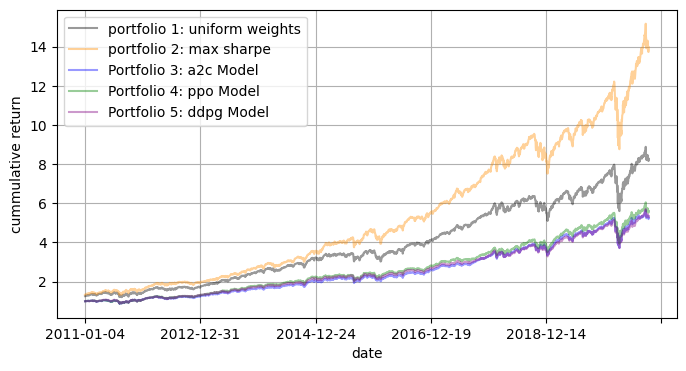

In [199]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_cum_returns.plot(ax=ax, color="black", alpha=0.4);
max_sharpe_cum_returns.plot(ax=ax, color="darkorange", alpha=0.4);

a2c_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
#ax.set_title("Backtest based on the data from 2011-01-31 to 2020-01-28", fontsize=14);
fig.savefig('results/back_test_on_train_data.png');

# Evaluating the Portfolios on Test Data

In [200]:
# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_test_returns = returns_test.dot(max_sharpe_weights)
max_sharpe_test_cum_returns = (1 + max_sharpe_test_returns).cumprod()
max_sharpe_test_cum_returns.name = "portfolio 2: max sharpe"

a2c_test_cum_returns = (1 + a2c_test_returns['daily_return']).cumprod()
a2c_test_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_test_cum_returns = (1 + ppo_test_returns['daily_return']).cumprod()
ppo_test_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_test_cum_returns = (1 + ddpg_test_returns['daily_return']).cumprod()
ddpg_test_cum_returns.name = 'Portfolio 5: ddpg Model'

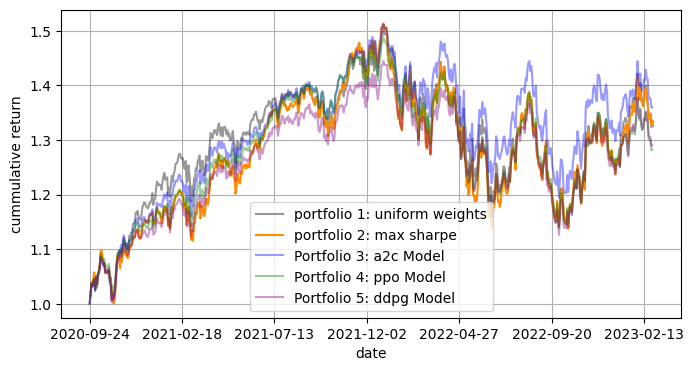

In [201]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_test_cum_returns.plot(ax=ax, color="black", alpha=.4);
max_sharpe_test_cum_returns.plot(ax=ax, color="darkorange");
a2c_test_cum_returns.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns.plot(ax=ax, color='purple', alpha=.4)
plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
#ax.set_title("Backtest based on the data from 2020-09-24 to 2023-02-22", fontsize=14);
fig.savefig('results/back_test_on_test_data.png');

# Get the Portfolio Statistics

In [203]:
# Define a Function for Getting the Portfolio Statistics

def portfolio_stats(portfolio_returns):
    # Pass the returns into a dataframe
    port_rets_df = pd.DataFrame(portfolio_returns)
    port_rets_df = port_rets_df.reset_index()
    port_rets_df.columns = ['date','daily_return']

    #Use the FinRL Library to get the Portfolio Returns
    #This makes use of the Pyfolio Library

    DRL_strat = backtest_strat(port_rets_df)
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func( returns=DRL_strat,
                                  factor_returns=DRL_strat,
                                    positions=None, transactions=None, turnover_denom="AGB")
    perf_stats_all = pd.DataFrame( perf_stats_all)
    perf_stats_all.columns = ['Statistic']
    return perf_stats_all

In [204]:
uw_test_returns.shape

(611,)

In [205]:
# Get the Portfolio Statistics for all the portfolios
portfolios_returns_dict = {'uniform_weights':uw_test_returns, 'maximum_sharpe':max_sharpe_test_returns,
                          'a2c Model': a2c_test_returns['daily_return'],
                          'ppo Model': ppo_test_returns['daily_return'],
                          'ddpg Model': ddpg_test_returns['daily_return']}

portfolios_stats = pd.DataFrame()
for i,j in portfolios_returns_dict.items():
    port_stats = portfolio_stats(j)
    portfolios_stats[i] = port_stats['Statistic']

In [206]:
portfolios_stats

,uniform_weights,maximum_sharpe,a2c Model,ppo Model,ddpg Model
Annual return,0.123397,0.125554,0.135290,0.108065,0.110932
Cumulative returns,0.325937,0.332120,0.359545,0.281964,0.290008
Annual volatility,0.211653,0.223386,0.198285,0.196730,0.190682
Sharpe ratio,0.656478,0.642093,0.739097,0.619987,0.647109
Calmar ratio,0.511566,0.505604,0.642550,0.460847,0.503237
Stability,0.119996,0.189090,0.334222,0.159064,0.228424
Max drawdown,-0.241214,-0.248326,-0.210552,-0.234492,-0.220436
Omega ratio,1.115614,1.112655,1.131269,1.108719,1.113464
Sortino ratio,0.951274,0.918001,1.078438,0.893176,0.928894
Skew,NaN,NaN,-0.069111,-0.115457,-0.172352


# Benchmarking the Best Portfolio against the Benchmark Index

In [207]:
a2c_test_returns = a2c_test_returns.set_index('date')
ppo_test_returns = ppo_test_returns.set_index('date')
#ddpg_test_returns = ddpg_test_returns.set_index('date')

In [208]:
ddpg_test_returns.head()

,date,daily_return
0,2020-09-24,0.000000
1,2020-09-25,0.014572
2,2020-09-28,0.020383
3,2020-09-29,-0.003764
4,2020-09-30,0.007430


In [209]:
# Getting the best performing portfolio

ps_cum = [a2c_test_cum_returns, ppo_test_cum_returns,ddpg_test_cum_returns]
ps = [a2c_test_returns['daily_return'], ppo_test_returns['daily_return'], ddpg_test_returns['daily_return']]

final_return = []
for p in ps_cum:
    final_return.append(p.iloc[-1])

id_ = np.argmax(final_return)
best_p = ps[id_]
best_p.name = (ps_cum[id_]).name

print("Best portfolio: ",  best_p.name)
print("Final cumulative return: {:.2f} ".format(final_return[id_]))

Best portfolio:  Portfolio 3: a2c Model
Final cumulative return: 1.36 


In [210]:
# convert the best portfolio into a Dataframe

best_p = pd.DataFrame(best_p)
best_p = best_p.reset_index()
best_p.columns=['date','daily_return']
best_p['date'] = ddpg_test_returns['date']

In [211]:
best_p.head()

,date,daily_return
0,2020-09-24,0.000000
1,2020-09-25,0.015794
2,2020-09-28,0.020399
3,2020-09-29,-0.003976
4,2020-09-30,0.007509


In [212]:
prices_test_dates = list(prices_test_df.index)

print("==============Get Index Stats===========")
baesline_perf_stats=BaselineStats('^NDX',
                                  baseline_start = prices_test_dates[0],
                                  baseline_end = prices_test_dates[-1])

==============Get Index Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (610, 8)
Annual return          0.042724
Cumulative returns     0.106578
Annual volatility      0.259733
Sharpe ratio           0.291145
Calmar ratio           0.120137
Stability              0.081250
Max drawdown          -0.355631
Omega ratio            1.049527
Sortino ratio          0.410465
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.944998
Daily value at risk   -0.032423
Alpha                  0.000000
Beta                   1.000000
dtype: float64


In [213]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^NDX",
        start = TEST_START_DATE,
        end = TEST_END_DATE)

stats = backtest_stats(baseline_df, value_col_name = 'close')
#print(stats)

==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (294, 8)
Annual return          0.275890
Cumulative returns     0.328767
Annual volatility      0.210050
Sharpe ratio           1.269545
Calmar ratio           2.158945
Stability              0.915024
Max drawdown          -0.127789
Omega ratio            1.244273
Sortino ratio          1.780778
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.916481
Daily value at risk   -0.025406
dtype: float64


In [214]:
ndx, ndx_strat = baseline_strat('^NDX',prices_test_dates[1], prices_test_dates[-1])

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (609, 8)
